In [1]:
import torch
torch.__version__

'2.1.0+cu121'

In [2]:
import torch
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 2060 SUPER'

In [3]:
from super_gradients.training import Trainer

CHECKPOINT_DIR = 'checkpoints'
trainer = Trainer(experiment_name='my_first_yolonas_run', ckpt_root_dir=CHECKPOINT_DIR)

[2024-02-02 14:35:10] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2024-02-02 14:35:10] WARNING - __init__.py - Failed to import pytorch_quantization


The console stream is logged into /home/akalanka/sg_logs/console.log


/home/akalanka/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[2024-02-02 14:35:12] WARNING - calibrator.py - Failed to import pytorch_quantization
[2024-02-02 14:35:12] WARNING - export.py - Failed to import pytorch_quantization
[2024-02-02 14:35:12] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


In [4]:
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val

In [5]:
dataset_params = {
    'data_dir':'/home/akalanka/HDD/Oshen_Temp/Research/YOLO_NAS/Smoke_Fire_Dataset',
    'train_images_dir':'/home/akalanka/HDD/Oshen_Temp/Research/YOLO_NAS/Smoke_Fire_Dataset/images/train',
    'train_labels_dir':'/home/akalanka/HDD/Oshen_Temp/Research/YOLO_NAS/Smoke_Fire_Dataset/labels/train',
    'val_images_dir':'/home/akalanka/HDD/Oshen_Temp/Research/YOLO_NAS/Smoke_Fire_Dataset/images/val',
    'val_labels_dir':'/home/akalanka/HDD/Oshen_Temp/Research/YOLO_NAS/Smoke_Fire_Dataset/labels/val',
    'test_images_dir':'/home/akalanka/HDD/Oshen_Temp/Research/YOLO_NAS/Smoke_Fire_Dataset/images/test',
    'test_labels_dir':'/home/akalanka/HDD/Oshen_Temp/Research/YOLO_NAS/Smoke_Fire_Dataset/labels/test',
    'classes': [ "Fire", "Smoke", "FireAndSmoke","NeitherFireNorSmoke"]
}

In [6]:
import torch

MODEL_ARCH = 'yolo_nas_l'
DEVICE = 'cuda' if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 8
MAX_EPOCHS = 100

In [7]:

### setting up dataloaders
train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

[2024-02-02 14:35:16] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 61000/61000 [29:10<00:00, 34.84it/s] 
[2024-02-02 15:04:27] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 19063/19063 [05:47<00:00, 54.86it/s]
[2024-02-02 15:10:14] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|█████████▉| 15244/15251 [04:39<00:00, 53.33it/s]

In [8]:
### applying custom transformations
train_data.dataset.transforms

[DetectionMosaic('additional_samples_count': 3, 'non_empty_targets': False, 'prob': 1.0, 'input_dim': (640, 640), 'enable_mosaic': True, 'border_value': 114),
 DetectionRandomAffine('additional_samples_count': 0, 'non_empty_targets': False, 'degrees': 10.0, 'translate': 0.1, 'scale': [0.1, 2], 'shear': 2.0, 'target_size': (640, 640), 'enable': True, 'filter_box_candidates': True, 'wh_thr': 2, 'ar_thr': 20, 'area_thr': 0.1, 'border_value': 114),
 DetectionMixup('additional_samples_count': 1, 'non_empty_targets': True, 'input_dim': (640, 640), 'mixup_scale': [0.5, 1.5], 'prob': 1.0, 'enable_mixup': True, 'flip_prob': 0.5, 'border_value': 114),
 DetectionHSV('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 1.0, 'hgain': 5, 'sgain': 30, 'vgain': 30, 'bgr_channels': (0, 1, 2), '_additional_channels_warned': False),
 DetectionHorizontalFlip('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 0.5),
 DetectionPaddedRescale('additional_samples_count': 0, 'non_em

Indexing dataset annotations: 100%|██████████| 15251/15251 [04:39<00:00, 54.53it/s]


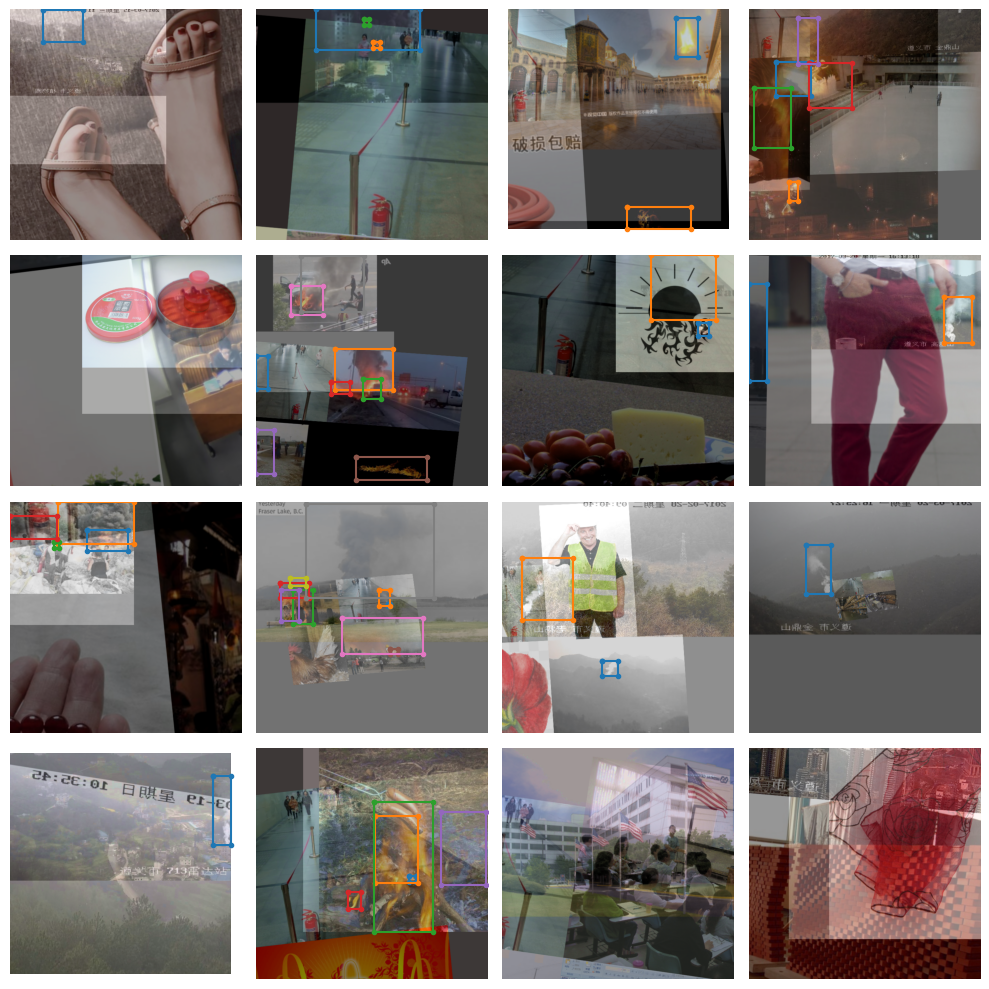

In [9]:
### visualizing data after transformation
train_data.dataset.plot()

In [10]:
from super_gradients.training import models

model = models.get(
    MODEL_ARCH, 
    num_classes=len(dataset_params['classes']), 
    pretrained_weights="coco"
)

[2024-02-02 15:14:58] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2024-02-02 15:14:58] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


In [11]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

train_params = {
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    "max_epochs": MAX_EPOCHS,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=1.0,
            top_k_predictions=300,
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

In [12]:

%load_ext tensorboard
%tensorboard --logdir {CHECKPOINT_DIR}/{EXPERIMENT_NAME}

In [13]:
trainer.train(model=model, 
              training_params=train_params, 
              train_loader=train_data, 
              valid_loader=val_data)

[2024-02-02 15:15:00] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20240202_151500_516859`
[2024-02-02 15:15:00] INFO - sg_trainer.py - Checkpoints directory: checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859
[2024-02-02 15:15:00] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}
/home/akalanka/anaconda3/envs/yolo-nas/lib/python3.8/site-packages/super_gradients/common/registry/registry.py:72: DeprecationWarning: Object name `linear_epoch_step` is now deprecated. Please replace it with `LinearEpochLRWarmup`.
  warnings.warn(f"Object name `{name}` is now deprecated. Please replace it with `{deprecated_names[name]}`.", DeprecationWarning)
/home/akalanka/anaconda3/envs/yolo-nas/lib/python3.8/site-packages/super_gradients/training/utils/optimizer_utils.py:107: DeprecationWarning: initialize_param_groups and update_param_groups usages are deprecated since 3.4.0, will be removed in 3.5.0 and have no effect. 
 Assign different learni

The console stream is now moved to checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/console_Feb02_15_15_00.txt


[2024-02-02 15:15:03] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Full dataset size:            35913      (len(train_set))
    - Batch size per GPU:           8          (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             8          (num_gpus * batch_size)
    - Effective Batch size:         8          (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         4489       (len(train_loader))
    - Gradient updates per epoch:   4489       (len(train_loader) / batch_accumulate)
    - Model: YoloNAS_L  (66.91M parameters, 66.91M optimized)
    - Learning Rates and Weight Decays:
      - default: (66.91M parameters). LR: 0.0005 (66.91M parameters) WD: 0.0, (84.70K parameters), WD: 0.0001, (66.82M parameters)

[2024-02-02 15:15:03] INFO - sg_trainer.py - Started training for 1

SUMMARY OF EPOCH 0
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.4792
│   ├── Ppyoloeloss/loss_iou = 0.631
│   ├── Ppyoloeloss/loss_dfl = 0.7097
│   └── Ppyoloeloss/loss = 2.8199
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.178
    ├── Ppyoloeloss/loss_iou = 0.5049
    ├── Ppyoloeloss/loss_dfl = 0.6149
    ├── Ppyoloeloss/loss = 2.2977
    ├── Precision@0.50 = 0.0
    ├── Recall@0.50 = 0.0
    ├── Map@0.50 = 0.3784
    └── F1@0.50 = 0.0



Validating epoch 1: 100%|██████████| 1397/1397 [05:32<00:00,  4.20it/s]
[2024-02-02 16:40:39] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-02 16:40:39] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.45631229877471924


SUMMARY OF EPOCH 1
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.2254
│   │   ├── Epoch N-1      = 1.4792 (↘ -0.2538)
│   │   └── Best until now = 1.4792 (↘ -0.2538)
│   ├── Ppyoloeloss/loss_iou = 0.5928
│   │   ├── Epoch N-1      = 0.631  (↘ -0.0381)
│   │   └── Best until now = 0.631  (↘ -0.0381)
│   ├── Ppyoloeloss/loss_dfl = 0.6803
│   │   ├── Epoch N-1      = 0.7097 (↘ -0.0294)
│   │   └── Best until now = 0.7097 (↘ -0.0294)
│   └── Ppyoloeloss/loss = 2.4985
│       ├── Epoch N-1      = 2.8199 (↘ -0.3214)
│       └── Best until now = 2.8199 (↘ -0.3214)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1262
    │   ├── Epoch N-1      = 1.178  (↘ -0.0518)
    │   └── Best until now = 1.178  (↘ -0.0518)
    ├── Ppyoloeloss/loss_iou = 0.5108
    │   ├── Epoch N-1      = 0.5049 (↗ 0.0059)
    │   └── Best until now = 0.5049 (↗ 0.0059)
    ├── Ppyoloeloss/loss_dfl = 0.6263
    │   ├── Epoch N-1      = 0.6149 (↗ 0.0114)
    │   └── Best until now = 0.6149 (↗ 0.0114)
    ├── Ppyoloeloss/loss =

Validating epoch 2: 100%|██████████| 1397/1397 [05:24<00:00,  4.31it/s]


SUMMARY OF EPOCH 2
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.2329
│   │   ├── Epoch N-1      = 1.2254 (↗ 0.0075)
│   │   └── Best until now = 1.2254 (↗ 0.0075)
│   ├── Ppyoloeloss/loss_iou = 0.599
│   │   ├── Epoch N-1      = 0.5928 (↗ 0.0062)
│   │   └── Best until now = 0.5928 (↗ 0.0062)
│   ├── Ppyoloeloss/loss_dfl = 0.6869
│   │   ├── Epoch N-1      = 0.6803 (↗ 0.0066)
│   │   └── Best until now = 0.6803 (↗ 0.0066)
│   └── Ppyoloeloss/loss = 2.5188
│       ├── Epoch N-1      = 2.4985 (↗ 0.0203)
│       └── Best until now = 2.4985 (↗ 0.0203)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.2283
    │   ├── Epoch N-1      = 1.1262 (↗ 0.1021)
    │   └── Best until now = 1.1262 (↗ 0.1021)
    ├── Ppyoloeloss/loss_iou = 0.5351
    │   ├── Epoch N-1      = 0.5108 (↗ 0.0244)
    │   └── Best until now = 0.5049 (↗ 0.0303)
    ├── Ppyoloeloss/loss_dfl = 0.6515
    │   ├── Epoch N-1      = 0.6263 (↗ 0.0252)
    │   └── Best until now = 0.6149 (↗ 0.0366)
    ├── Ppyoloeloss/loss = 2.4149
   

Validating epoch 3: 100%|██████████| 1397/1397 [05:27<00:00,  4.27it/s]


SUMMARY OF EPOCH 3
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.2298
│   │   ├── Epoch N-1      = 1.2329 (↘ -0.0031)
│   │   └── Best until now = 1.2254 (↗ 0.0044)
│   ├── Ppyoloeloss/loss_iou = 0.5927
│   │   ├── Epoch N-1      = 0.599  (↘ -0.0063)
│   │   └── Best until now = 0.5928 (↘ -1e-04)
│   ├── Ppyoloeloss/loss_dfl = 0.6896
│   │   ├── Epoch N-1      = 0.6869 (↗ 0.0028)
│   │   └── Best until now = 0.6803 (↗ 0.0093)
│   └── Ppyoloeloss/loss = 2.5121
│       ├── Epoch N-1      = 2.5188 (↘ -0.0067)
│       └── Best until now = 2.4985 (↗ 0.0136)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.162
    │   ├── Epoch N-1      = 1.2283 (↘ -0.0663)
    │   └── Best until now = 1.1262 (↗ 0.0358)
    ├── Ppyoloeloss/loss_iou = 0.5043
    │   ├── Epoch N-1      = 0.5351 (↘ -0.0308)
    │   └── Best until now = 0.5049 (↘ -0.0005)
    ├── Ppyoloeloss/loss_dfl = 0.619
    │   ├── Epoch N-1      = 0.6515 (↘ -0.0325)
    │   └── Best until now = 0.6149 (↗ 0.0041)
    ├── Ppyoloeloss/loss = 2.28

Validating epoch 4: 100%|██████████| 1397/1397 [05:26<00:00,  4.28it/s]


SUMMARY OF EPOCH 4
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.202
│   │   ├── Epoch N-1      = 1.2298 (↘ -0.0278)
│   │   └── Best until now = 1.2254 (↘ -0.0234)
│   ├── Ppyoloeloss/loss_iou = 0.5729
│   │   ├── Epoch N-1      = 0.5927 (↘ -0.0197)
│   │   └── Best until now = 0.5927 (↘ -0.0197)
│   ├── Ppyoloeloss/loss_dfl = 0.6693
│   │   ├── Epoch N-1      = 0.6896 (↘ -0.0204)
│   │   └── Best until now = 0.6803 (↘ -0.011)
│   └── Ppyoloeloss/loss = 2.4442
│       ├── Epoch N-1      = 2.5121 (↘ -0.0679)
│       └── Best until now = 2.4985 (↘ -0.0543)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1404
    │   ├── Epoch N-1      = 1.162  (↘ -0.0216)
    │   └── Best until now = 1.1262 (↗ 0.0143)
    ├── Ppyoloeloss/loss_iou = 0.4957
    │   ├── Epoch N-1      = 0.5043 (↘ -0.0086)
    │   └── Best until now = 0.5043 (↘ -0.0086)
    ├── Ppyoloeloss/loss_dfl = 0.6034
    │   ├── Epoch N-1      = 0.619  (↘ -0.0156)
    │   └── Best until now = 0.6149 (↘ -0.0115)
    ├── Ppyoloeloss/loss 

Validating epoch 5: 100%|██████████| 1397/1397 [05:24<00:00,  4.31it/s]


SUMMARY OF EPOCH 5
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1867
│   │   ├── Epoch N-1      = 1.202  (↘ -0.0153)
│   │   └── Best until now = 1.202  (↘ -0.0153)
│   ├── Ppyoloeloss/loss_iou = 0.5605
│   │   ├── Epoch N-1      = 0.5729 (↘ -0.0125)
│   │   └── Best until now = 0.5729 (↘ -0.0125)
│   ├── Ppyoloeloss/loss_dfl = 0.6567
│   │   ├── Epoch N-1      = 0.6693 (↘ -0.0125)
│   │   └── Best until now = 0.6693 (↘ -0.0125)
│   └── Ppyoloeloss/loss = 2.4039
│       ├── Epoch N-1      = 2.4442 (↘ -0.0403)
│       └── Best until now = 2.4442 (↘ -0.0403)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1397
    │   ├── Epoch N-1      = 1.1404 (↘ -0.0008)
    │   └── Best until now = 1.1262 (↗ 0.0135)
    ├── Ppyoloeloss/loss_iou = 0.512
    │   ├── Epoch N-1      = 0.4957 (↗ 0.0163)
    │   └── Best until now = 0.4957 (↗ 0.0163)
    ├── Ppyoloeloss/loss_dfl = 0.6283
    │   ├── Epoch N-1      = 0.6034 (↗ 0.0249)
    │   └── Best until now = 0.6034 (↗ 0.0249)
    ├── Ppyoloeloss/loss = 2

Validating epoch 6: 100%|██████████| 1397/1397 [05:24<00:00,  4.30it/s]
[2024-02-02 19:56:11] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-02 19:56:11] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5251110792160034


SUMMARY OF EPOCH 6
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1759
│   │   ├── Epoch N-1      = 1.1867 (↘ -0.0109)
│   │   └── Best until now = 1.1867 (↘ -0.0109)
│   ├── Ppyoloeloss/loss_iou = 0.5548
│   │   ├── Epoch N-1      = 0.5605 (↘ -0.0057)
│   │   └── Best until now = 0.5605 (↘ -0.0057)
│   ├── Ppyoloeloss/loss_dfl = 0.6495
│   │   ├── Epoch N-1      = 0.6567 (↘ -0.0072)
│   │   └── Best until now = 0.6567 (↘ -0.0072)
│   └── Ppyoloeloss/loss = 2.3801
│       ├── Epoch N-1      = 2.4039 (↘ -0.0238)
│       └── Best until now = 2.4039 (↘ -0.0238)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0909
    │   ├── Epoch N-1      = 1.1397 (↘ -0.0488)
    │   └── Best until now = 1.1262 (↘ -0.0353)
    ├── Ppyoloeloss/loss_iou = 0.4881
    │   ├── Epoch N-1      = 0.512  (↘ -0.024)
    │   └── Best until now = 0.4957 (↘ -0.0077)
    ├── Ppyoloeloss/loss_dfl = 0.5926
    │   ├── Epoch N-1      = 0.6283 (↘ -0.0357)
    │   └── Best until now = 0.6034 (↘ -0.0108)
    ├── Ppyoloeloss/los

Validating epoch 7: 100%|██████████| 1397/1397 [05:24<00:00,  4.31it/s]


SUMMARY OF EPOCH 7
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1653
│   │   ├── Epoch N-1      = 1.1759 (↘ -0.0105)
│   │   └── Best until now = 1.1759 (↘ -0.0105)
│   ├── Ppyoloeloss/loss_iou = 0.5482
│   │   ├── Epoch N-1      = 0.5548 (↘ -0.0066)
│   │   └── Best until now = 0.5548 (↘ -0.0066)
│   ├── Ppyoloeloss/loss_dfl = 0.6434
│   │   ├── Epoch N-1      = 0.6495 (↘ -0.0061)
│   │   └── Best until now = 0.6495 (↘ -0.0061)
│   └── Ppyoloeloss/loss = 2.3569
│       ├── Epoch N-1      = 2.3801 (↘ -0.0233)
│       └── Best until now = 2.3801 (↘ -0.0233)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1531
    │   ├── Epoch N-1      = 1.0909 (↗ 0.0622)
    │   └── Best until now = 1.0909 (↗ 0.0622)
    ├── Ppyoloeloss/loss_iou = 0.4791
    │   ├── Epoch N-1      = 0.4881 (↘ -0.009)
    │   └── Best until now = 0.4881 (↘ -0.009)
    ├── Ppyoloeloss/loss_dfl = 0.5915
    │   ├── Epoch N-1      = 0.5926 (↘ -0.0011)
    │   └── Best until now = 0.5926 (↘ -0.0011)
    ├── Ppyoloeloss/loss =

Validating epoch 8: 100%|██████████| 1397/1397 [05:24<00:00,  4.31it/s]
[2024-02-02 21:18:11] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-02 21:18:11] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.535858154296875


SUMMARY OF EPOCH 8
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.161
│   │   ├── Epoch N-1      = 1.1653 (↘ -0.0043)
│   │   └── Best until now = 1.1653 (↘ -0.0043)
│   ├── Ppyoloeloss/loss_iou = 0.5465
│   │   ├── Epoch N-1      = 0.5482 (↘ -0.0016)
│   │   └── Best until now = 0.5482 (↘ -0.0016)
│   ├── Ppyoloeloss/loss_dfl = 0.64
│   │   ├── Epoch N-1      = 0.6434 (↘ -0.0034)
│   │   └── Best until now = 0.6434 (↘ -0.0034)
│   └── Ppyoloeloss/loss = 2.3475
│       ├── Epoch N-1      = 2.3569 (↘ -0.0094)
│       └── Best until now = 2.3569 (↘ -0.0094)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0865
    │   ├── Epoch N-1      = 1.1531 (↘ -0.0666)
    │   └── Best until now = 1.0909 (↘ -0.0044)
    ├── Ppyoloeloss/loss_iou = 0.4767
    │   ├── Epoch N-1      = 0.4791 (↘ -0.0024)
    │   └── Best until now = 0.4791 (↘ -0.0024)
    ├── Ppyoloeloss/loss_dfl = 0.5846
    │   ├── Epoch N-1      = 0.5915 (↘ -0.0069)
    │   └── Best until now = 0.5915 (↘ -0.0069)
    ├── Ppyoloeloss/loss 

Validating epoch 9: 100%|██████████| 1397/1397 [05:22<00:00,  4.33it/s]
[2024-02-02 22:01:27] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-02 22:01:27] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5479999780654907


SUMMARY OF EPOCH 9
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1533
│   │   ├── Epoch N-1      = 1.161  (↘ -0.0077)
│   │   └── Best until now = 1.161  (↘ -0.0077)
│   ├── Ppyoloeloss/loss_iou = 0.5437
│   │   ├── Epoch N-1      = 0.5465 (↘ -0.0029)
│   │   └── Best until now = 0.5465 (↘ -0.0029)
│   ├── Ppyoloeloss/loss_dfl = 0.6363
│   │   ├── Epoch N-1      = 0.64   (↘ -0.0036)
│   │   └── Best until now = 0.64   (↘ -0.0036)
│   └── Ppyoloeloss/loss = 2.3333
│       ├── Epoch N-1      = 2.3475 (↘ -0.0142)
│       └── Best until now = 2.3475 (↘ -0.0142)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0775
    │   ├── Epoch N-1      = 1.0865 (↘ -0.009)
    │   └── Best until now = 1.0865 (↘ -0.009)
    ├── Ppyoloeloss/loss_iou = 0.4851
    │   ├── Epoch N-1      = 0.4767 (↗ 0.0084)
    │   └── Best until now = 0.4767 (↗ 0.0084)
    ├── Ppyoloeloss/loss_dfl = 0.5897
    │   ├── Epoch N-1      = 0.5846 (↗ 0.005)
    │   └── Best until now = 0.5846 (↗ 0.005)
    ├── Ppyoloeloss/loss = 2.1

Validating epoch 10: 100%|██████████| 1397/1397 [05:24<00:00,  4.30it/s]


SUMMARY OF EPOCH 10
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1484
│   │   ├── Epoch N-1      = 1.1533 (↘ -0.0049)
│   │   └── Best until now = 1.1533 (↘ -0.0049)
│   ├── Ppyoloeloss/loss_iou = 0.5412
│   │   ├── Epoch N-1      = 0.5437 (↘ -0.0024)
│   │   └── Best until now = 0.5437 (↘ -0.0024)
│   ├── Ppyoloeloss/loss_dfl = 0.6326
│   │   ├── Epoch N-1      = 0.6363 (↘ -0.0037)
│   │   └── Best until now = 0.6363 (↘ -0.0037)
│   └── Ppyoloeloss/loss = 2.3223
│       ├── Epoch N-1      = 2.3333 (↘ -0.0111)
│       └── Best until now = 2.3333 (↘ -0.0111)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0947
    │   ├── Epoch N-1      = 1.0775 (↗ 0.0172)
    │   └── Best until now = 1.0775 (↗ 0.0172)
    ├── Ppyoloeloss/loss_iou = 0.4815
    │   ├── Epoch N-1      = 0.4851 (↘ -0.0036)
    │   └── Best until now = 0.4767 (↗ 0.0048)
    ├── Ppyoloeloss/loss_dfl = 0.5815
    │   ├── Epoch N-1      = 0.5897 (↘ -0.0081)
    │   └── Best until now = 0.5846 (↘ -0.0031)
    ├── Ppyoloeloss/loss

Validating epoch 11: 100%|██████████| 1397/1397 [05:19<00:00,  4.37it/s]


SUMMARY OF EPOCH 11
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1413
│   │   ├── Epoch N-1      = 1.1484 (↘ -0.0072)
│   │   └── Best until now = 1.1484 (↘ -0.0072)
│   ├── Ppyoloeloss/loss_iou = 0.5379
│   │   ├── Epoch N-1      = 0.5412 (↘ -0.0034)
│   │   └── Best until now = 0.5412 (↘ -0.0034)
│   ├── Ppyoloeloss/loss_dfl = 0.6298
│   │   ├── Epoch N-1      = 0.6326 (↘ -0.0028)
│   │   └── Best until now = 0.6326 (↘ -0.0028)
│   └── Ppyoloeloss/loss = 2.3089
│       ├── Epoch N-1      = 2.3223 (↘ -0.0133)
│       └── Best until now = 2.3223 (↘ -0.0133)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0792
    │   ├── Epoch N-1      = 1.0947 (↘ -0.0156)
    │   └── Best until now = 1.0775 (↗ 0.0017)
    ├── Ppyoloeloss/loss_iou = 0.4823
    │   ├── Epoch N-1      = 0.4815 (↗ 0.0008)
    │   └── Best until now = 0.4767 (↗ 0.0056)
    ├── Ppyoloeloss/loss_dfl = 0.5854
    │   ├── Epoch N-1      = 0.5815 (↗ 0.0038)
    │   └── Best until now = 0.5815 (↗ 0.0038)
    ├── Ppyoloeloss/loss =

Validating epoch 12: 100%|██████████| 1397/1397 [05:23<00:00,  4.32it/s]


SUMMARY OF EPOCH 12
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1389
│   │   ├── Epoch N-1      = 1.1413 (↘ -0.0024)
│   │   └── Best until now = 1.1413 (↘ -0.0024)
│   ├── Ppyoloeloss/loss_iou = 0.5362
│   │   ├── Epoch N-1      = 0.5379 (↘ -0.0016)
│   │   └── Best until now = 0.5379 (↘ -0.0016)
│   ├── Ppyoloeloss/loss_dfl = 0.6285
│   │   ├── Epoch N-1      = 0.6298 (↘ -0.0013)
│   │   └── Best until now = 0.6298 (↘ -0.0013)
│   └── Ppyoloeloss/loss = 2.3036
│       ├── Epoch N-1      = 2.3089 (↘ -0.0053)
│       └── Best until now = 2.3089 (↘ -0.0053)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0545
    │   ├── Epoch N-1      = 1.0792 (↘ -0.0246)
    │   └── Best until now = 1.0775 (↘ -0.0229)
    ├── Ppyoloeloss/loss_iou = 0.4811
    │   ├── Epoch N-1      = 0.4823 (↘ -0.0012)
    │   └── Best until now = 0.4767 (↗ 0.0044)
    ├── Ppyoloeloss/loss_dfl = 0.5816
    │   ├── Epoch N-1      = 0.5854 (↘ -0.0037)
    │   └── Best until now = 0.5815 (↗ 1e-04)
    ├── Ppyoloeloss/loss

Validating epoch 13: 100%|██████████| 1397/1397 [05:22<00:00,  4.33it/s]
[2024-02-03 00:47:56] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-03 00:47:56] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5614800453186035


SUMMARY OF EPOCH 13
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1332
│   │   ├── Epoch N-1      = 1.1389 (↘ -0.0057)
│   │   └── Best until now = 1.1389 (↘ -0.0057)
│   ├── Ppyoloeloss/loss_iou = 0.5362
│   │   ├── Epoch N-1      = 0.5362 (↘ -1e-04)
│   │   └── Best until now = 0.5362 (↘ -1e-04)
│   ├── Ppyoloeloss/loss_dfl = 0.6259
│   │   ├── Epoch N-1      = 0.6285 (↘ -0.0026)
│   │   └── Best until now = 0.6285 (↘ -0.0026)
│   └── Ppyoloeloss/loss = 2.2952
│       ├── Epoch N-1      = 2.3036 (↘ -0.0084)
│       └── Best until now = 2.3036 (↘ -0.0084)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0379
    │   ├── Epoch N-1      = 1.0545 (↘ -0.0166)
    │   └── Best until now = 1.0545 (↘ -0.0166)
    ├── Ppyoloeloss/loss_iou = 0.4653
    │   ├── Epoch N-1      = 0.4811 (↘ -0.0157)
    │   └── Best until now = 0.4767 (↘ -0.0114)
    ├── Ppyoloeloss/loss_dfl = 0.5821
    │   ├── Epoch N-1      = 0.5816 (↗ 0.0004)
    │   └── Best until now = 0.5815 (↗ 0.0006)
    ├── Ppyoloeloss/loss 

Validating epoch 14: 100%|██████████| 1397/1397 [05:23<00:00,  4.32it/s]
[2024-02-03 01:30:32] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-03 01:30:32] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5618385076522827


SUMMARY OF EPOCH 14
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1313
│   │   ├── Epoch N-1      = 1.1332 (↘ -0.0018)
│   │   └── Best until now = 1.1332 (↘ -0.0018)
│   ├── Ppyoloeloss/loss_iou = 0.5333
│   │   ├── Epoch N-1      = 0.5362 (↘ -0.0029)
│   │   └── Best until now = 0.5362 (↘ -0.0029)
│   ├── Ppyoloeloss/loss_dfl = 0.6238
│   │   ├── Epoch N-1      = 0.6259 (↘ -0.0021)
│   │   └── Best until now = 0.6259 (↘ -0.0021)
│   └── Ppyoloeloss/loss = 2.2884
│       ├── Epoch N-1      = 2.2952 (↘ -0.0068)
│       └── Best until now = 2.2952 (↘ -0.0068)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0774
    │   ├── Epoch N-1      = 1.0379 (↗ 0.0394)
    │   └── Best until now = 1.0379 (↗ 0.0394)
    ├── Ppyoloeloss/loss_iou = 0.46
    │   ├── Epoch N-1      = 0.4653 (↘ -0.0053)
    │   └── Best until now = 0.4653 (↘ -0.0053)
    ├── Ppyoloeloss/loss_dfl = 0.5676
    │   ├── Epoch N-1      = 0.5821 (↘ -0.0145)
    │   └── Best until now = 0.5815 (↘ -0.0139)
    ├── Ppyoloeloss/loss 

Validating epoch 15: 100%|██████████| 1397/1397 [05:23<00:00,  4.31it/s]
[2024-02-03 02:13:02] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-03 02:13:02] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.580665111541748


SUMMARY OF EPOCH 15
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1287
│   │   ├── Epoch N-1      = 1.1313 (↘ -0.0027)
│   │   └── Best until now = 1.1313 (↘ -0.0027)
│   ├── Ppyoloeloss/loss_iou = 0.5314
│   │   ├── Epoch N-1      = 0.5333 (↘ -0.0018)
│   │   └── Best until now = 0.5333 (↘ -0.0018)
│   ├── Ppyoloeloss/loss_dfl = 0.6239
│   │   ├── Epoch N-1      = 0.6238 (↗ 0.0)
│   │   └── Best until now = 0.6238 (↗ 0.0)
│   └── Ppyoloeloss/loss = 2.2839
│       ├── Epoch N-1      = 2.2884 (↘ -0.0044)
│       └── Best until now = 2.2884 (↘ -0.0044)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0214
    │   ├── Epoch N-1      = 1.0774 (↘ -0.056)
    │   └── Best until now = 1.0379 (↘ -0.0166)
    ├── Ppyoloeloss/loss_iou = 0.4596
    │   ├── Epoch N-1      = 0.46   (↘ -0.0004)
    │   └── Best until now = 0.46   (↘ -0.0004)
    ├── Ppyoloeloss/loss_dfl = 0.5667
    │   ├── Epoch N-1      = 0.5676 (↘ -0.0009)
    │   └── Best until now = 0.5676 (↘ -0.0009)
    ├── Ppyoloeloss/loss = 2.0

Validating epoch 16: 100%|██████████| 1397/1397 [05:19<00:00,  4.37it/s]


SUMMARY OF EPOCH 16
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1271
│   │   ├── Epoch N-1      = 1.1287 (↘ -0.0015)
│   │   └── Best until now = 1.1287 (↘ -0.0015)
│   ├── Ppyoloeloss/loss_iou = 0.5313
│   │   ├── Epoch N-1      = 0.5314 (↘ -1e-04)
│   │   └── Best until now = 0.5314 (↘ -1e-04)
│   ├── Ppyoloeloss/loss_dfl = 0.6214
│   │   ├── Epoch N-1      = 0.6239 (↘ -0.0025)
│   │   └── Best until now = 0.6238 (↘ -0.0024)
│   └── Ppyoloeloss/loss = 2.2798
│       ├── Epoch N-1      = 2.2839 (↘ -0.0041)
│       └── Best until now = 2.2839 (↘ -0.0041)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0196
    │   ├── Epoch N-1      = 1.0214 (↘ -0.0018)
    │   └── Best until now = 1.0214 (↘ -0.0018)
    ├── Ppyoloeloss/loss_iou = 0.4677
    │   ├── Epoch N-1      = 0.4596 (↗ 0.0081)
    │   └── Best until now = 0.4596 (↗ 0.0081)
    ├── Ppyoloeloss/loss_dfl = 0.565
    │   ├── Epoch N-1      = 0.5667 (↘ -0.0017)
    │   └── Best until now = 0.5667 (↘ -0.0017)
    ├── Ppyoloeloss/loss =

Validating epoch 17: 100%|██████████| 1397/1397 [05:23<00:00,  4.31it/s]


SUMMARY OF EPOCH 17
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1253
│   │   ├── Epoch N-1      = 1.1271 (↘ -0.0018)
│   │   └── Best until now = 1.1271 (↘ -0.0018)
│   ├── Ppyoloeloss/loss_iou = 0.5313
│   │   ├── Epoch N-1      = 0.5313 (↗ 0.0)
│   │   └── Best until now = 0.5313 (↗ 0.0)
│   ├── Ppyoloeloss/loss_dfl = 0.621
│   │   ├── Epoch N-1      = 0.6214 (↘ -0.0004)
│   │   └── Best until now = 0.6214 (↘ -0.0004)
│   └── Ppyoloeloss/loss = 2.2777
│       ├── Epoch N-1      = 2.2798 (↘ -0.0022)
│       └── Best until now = 2.2798 (↘ -0.0022)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0886
    │   ├── Epoch N-1      = 1.0196 (↗ 0.069)
    │   └── Best until now = 1.0196 (↗ 0.069)
    ├── Ppyoloeloss/loss_iou = 0.4699
    │   ├── Epoch N-1      = 0.4677 (↗ 0.0022)
    │   └── Best until now = 0.4596 (↗ 0.0103)
    ├── Ppyoloeloss/loss_dfl = 0.5817
    │   ├── Epoch N-1      = 0.565  (↗ 0.0167)
    │   └── Best until now = 0.565  (↗ 0.0167)
    ├── Ppyoloeloss/loss = 2.1401
    

Validating epoch 18: 100%|██████████| 1397/1397 [05:23<00:00,  4.32it/s]


SUMMARY OF EPOCH 18
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.123
│   │   ├── Epoch N-1      = 1.1253 (↘ -0.0024)
│   │   └── Best until now = 1.1253 (↘ -0.0024)
│   ├── Ppyoloeloss/loss_iou = 0.5291
│   │   ├── Epoch N-1      = 0.5313 (↘ -0.0022)
│   │   └── Best until now = 0.5313 (↘ -0.0022)
│   ├── Ppyoloeloss/loss_dfl = 0.6198
│   │   ├── Epoch N-1      = 0.621  (↘ -0.0012)
│   │   └── Best until now = 0.621  (↘ -0.0012)
│   └── Ppyoloeloss/loss = 2.2718
│       ├── Epoch N-1      = 2.2777 (↘ -0.0059)
│       └── Best until now = 2.2777 (↘ -0.0059)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0846
    │   ├── Epoch N-1      = 1.0886 (↘ -0.004)
    │   └── Best until now = 1.0196 (↗ 0.065)
    ├── Ppyoloeloss/loss_iou = 0.4801
    │   ├── Epoch N-1      = 0.4699 (↗ 0.0103)
    │   └── Best until now = 0.4596 (↗ 0.0205)
    ├── Ppyoloeloss/loss_dfl = 0.591
    │   ├── Epoch N-1      = 0.5817 (↗ 0.0093)
    │   └── Best until now = 0.565  (↗ 0.026)
    ├── Ppyoloeloss/loss = 2.15

Validating epoch 19: 100%|██████████| 1397/1397 [05:23<00:00,  4.32it/s]


SUMMARY OF EPOCH 19
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1212
│   │   ├── Epoch N-1      = 1.123  (↘ -0.0018)
│   │   └── Best until now = 1.123  (↘ -0.0018)
│   ├── Ppyoloeloss/loss_iou = 0.5278
│   │   ├── Epoch N-1      = 0.5291 (↘ -0.0013)
│   │   └── Best until now = 0.5291 (↘ -0.0013)
│   ├── Ppyoloeloss/loss_dfl = 0.6197
│   │   ├── Epoch N-1      = 0.6198 (↘ -1e-04)
│   │   └── Best until now = 0.6198 (↘ -1e-04)
│   └── Ppyoloeloss/loss = 2.2687
│       ├── Epoch N-1      = 2.2718 (↘ -0.0032)
│       └── Best until now = 2.2718 (↘ -0.0032)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.024
    │   ├── Epoch N-1      = 1.0846 (↘ -0.0606)
    │   └── Best until now = 1.0196 (↗ 0.0044)
    ├── Ppyoloeloss/loss_iou = 0.4618
    │   ├── Epoch N-1      = 0.4801 (↘ -0.0183)
    │   └── Best until now = 0.4596 (↗ 0.0022)
    ├── Ppyoloeloss/loss_dfl = 0.5716
    │   ├── Epoch N-1      = 0.591  (↘ -0.0194)
    │   └── Best until now = 0.565  (↗ 0.0066)
    ├── Ppyoloeloss/loss = 

Validating epoch 20: 100%|██████████| 1397/1397 [05:22<00:00,  4.34it/s]


SUMMARY OF EPOCH 20
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1168
│   │   ├── Epoch N-1      = 1.1212 (↘ -0.0044)
│   │   └── Best until now = 1.1212 (↘ -0.0044)
│   ├── Ppyoloeloss/loss_iou = 0.5278
│   │   ├── Epoch N-1      = 0.5278 (↗ 0.0)
│   │   └── Best until now = 0.5278 (↗ 0.0)
│   ├── Ppyoloeloss/loss_dfl = 0.6191
│   │   ├── Epoch N-1      = 0.6197 (↘ -0.0006)
│   │   └── Best until now = 0.6197 (↘ -0.0006)
│   └── Ppyoloeloss/loss = 2.2636
│       ├── Epoch N-1      = 2.2687 (↘ -0.005)
│       └── Best until now = 2.2687 (↘ -0.005)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0153
    │   ├── Epoch N-1      = 1.024  (↘ -0.0087)
    │   └── Best until now = 1.0196 (↘ -0.0043)
    ├── Ppyoloeloss/loss_iou = 0.4513
    │   ├── Epoch N-1      = 0.4618 (↘ -0.0105)
    │   └── Best until now = 0.4596 (↘ -0.0083)
    ├── Ppyoloeloss/loss_dfl = 0.5599
    │   ├── Epoch N-1      = 0.5716 (↘ -0.0117)
    │   └── Best until now = 0.565  (↘ -0.0051)
    ├── Ppyoloeloss/loss = 2.02

Validating epoch 21: 100%|██████████| 1397/1397 [05:23<00:00,  4.32it/s]


SUMMARY OF EPOCH 21
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1176
│   │   ├── Epoch N-1      = 1.1168 (↗ 0.0009)
│   │   └── Best until now = 1.1168 (↗ 0.0009)
│   ├── Ppyoloeloss/loss_iou = 0.5283
│   │   ├── Epoch N-1      = 0.5278 (↗ 0.0005)
│   │   └── Best until now = 0.5278 (↗ 0.0005)
│   ├── Ppyoloeloss/loss_dfl = 0.6179
│   │   ├── Epoch N-1      = 0.6191 (↘ -0.0012)
│   │   └── Best until now = 0.6191 (↘ -0.0012)
│   └── Ppyoloeloss/loss = 2.2638
│       ├── Epoch N-1      = 2.2636 (↗ 0.0002)
│       └── Best until now = 2.2636 (↗ 0.0002)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1061
    │   ├── Epoch N-1      = 1.0153 (↗ 0.0908)
    │   └── Best until now = 1.0153 (↗ 0.0908)
    ├── Ppyoloeloss/loss_iou = 0.4852
    │   ├── Epoch N-1      = 0.4513 (↗ 0.0339)
    │   └── Best until now = 0.4513 (↗ 0.0339)
    ├── Ppyoloeloss/loss_dfl = 0.5959
    │   ├── Epoch N-1      = 0.5599 (↗ 0.036)
    │   └── Best until now = 0.5599 (↗ 0.036)
    ├── Ppyoloeloss/loss = 2.1873
 

Validating epoch 22: 100%|██████████| 1397/1397 [05:23<00:00,  4.32it/s]


SUMMARY OF EPOCH 22
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1147
│   │   ├── Epoch N-1      = 1.1176 (↘ -0.0029)
│   │   └── Best until now = 1.1168 (↘ -0.0021)
│   ├── Ppyoloeloss/loss_iou = 0.5261
│   │   ├── Epoch N-1      = 0.5283 (↘ -0.0022)
│   │   └── Best until now = 0.5278 (↘ -0.0017)
│   ├── Ppyoloeloss/loss_dfl = 0.6168
│   │   ├── Epoch N-1      = 0.6179 (↘ -0.0011)
│   │   └── Best until now = 0.6179 (↘ -0.0011)
│   └── Ppyoloeloss/loss = 2.2576
│       ├── Epoch N-1      = 2.2638 (↘ -0.0062)
│       └── Best until now = 2.2636 (↘ -0.0061)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0461
    │   ├── Epoch N-1      = 1.1061 (↘ -0.0601)
    │   └── Best until now = 1.0153 (↗ 0.0308)
    ├── Ppyoloeloss/loss_iou = 0.4715
    │   ├── Epoch N-1      = 0.4852 (↘ -0.0138)
    │   └── Best until now = 0.4513 (↗ 0.0202)
    ├── Ppyoloeloss/loss_dfl = 0.5791
    │   ├── Epoch N-1      = 0.5959 (↘ -0.0168)
    │   └── Best until now = 0.5599 (↗ 0.0192)
    ├── Ppyoloeloss/loss

Validating epoch 23: 100%|██████████| 1397/1397 [05:22<00:00,  4.33it/s]
[2024-02-03 07:43:12] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-03 07:43:12] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5959891676902771


SUMMARY OF EPOCH 23
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1071
│   │   ├── Epoch N-1      = 1.1147 (↘ -0.0076)
│   │   └── Best until now = 1.1147 (↘ -0.0076)
│   ├── Ppyoloeloss/loss_iou = 0.525
│   │   ├── Epoch N-1      = 0.5261 (↘ -0.001)
│   │   └── Best until now = 0.5261 (↘ -0.001)
│   ├── Ppyoloeloss/loss_dfl = 0.6131
│   │   ├── Epoch N-1      = 0.6168 (↘ -0.0037)
│   │   └── Best until now = 0.6168 (↘ -0.0037)
│   └── Ppyoloeloss/loss = 2.2452
│       ├── Epoch N-1      = 2.2576 (↘ -0.0123)
│       └── Best until now = 2.2576 (↘ -0.0123)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0269
    │   ├── Epoch N-1      = 1.0461 (↘ -0.0191)
    │   └── Best until now = 1.0153 (↗ 0.0116)
    ├── Ppyoloeloss/loss_iou = 0.4488
    │   ├── Epoch N-1      = 0.4715 (↘ -0.0227)
    │   └── Best until now = 0.4513 (↘ -0.0025)
    ├── Ppyoloeloss/loss_dfl = 0.5546
    │   ├── Epoch N-1      = 0.5791 (↘ -0.0245)
    │   └── Best until now = 0.5599 (↘ -0.0053)
    ├── Ppyoloeloss/loss 

Validating epoch 24: 100%|██████████| 1397/1397 [05:16<00:00,  4.41it/s]


SUMMARY OF EPOCH 24
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1074
│   │   ├── Epoch N-1      = 1.1071 (↗ 0.0003)
│   │   └── Best until now = 1.1071 (↗ 0.0003)
│   ├── Ppyoloeloss/loss_iou = 0.5265
│   │   ├── Epoch N-1      = 0.525  (↗ 0.0014)
│   │   └── Best until now = 0.525  (↗ 0.0014)
│   ├── Ppyoloeloss/loss_dfl = 0.6147
│   │   ├── Epoch N-1      = 0.6131 (↗ 0.0016)
│   │   └── Best until now = 0.6131 (↗ 0.0016)
│   └── Ppyoloeloss/loss = 2.2486
│       ├── Epoch N-1      = 2.2452 (↗ 0.0033)
│       └── Best until now = 2.2452 (↗ 0.0033)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0576
    │   ├── Epoch N-1      = 1.0269 (↗ 0.0307)
    │   └── Best until now = 1.0153 (↗ 0.0423)
    ├── Ppyoloeloss/loss_iou = 0.4631
    │   ├── Epoch N-1      = 0.4488 (↗ 0.0143)
    │   └── Best until now = 0.4488 (↗ 0.0143)
    ├── Ppyoloeloss/loss_dfl = 0.5676
    │   ├── Epoch N-1      = 0.5546 (↗ 0.013)
    │   └── Best until now = 0.5546 (↗ 0.013)
    ├── Ppyoloeloss/loss = 2.0883
   

Validating epoch 25: 100%|██████████| 1397/1397 [05:24<00:00,  4.31it/s]


SUMMARY OF EPOCH 25
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1094
│   │   ├── Epoch N-1      = 1.1074 (↗ 0.0019)
│   │   └── Best until now = 1.1071 (↗ 0.0023)
│   ├── Ppyoloeloss/loss_iou = 0.5252
│   │   ├── Epoch N-1      = 0.5265 (↘ -0.0012)
│   │   └── Best until now = 0.525  (↗ 0.0002)
│   ├── Ppyoloeloss/loss_dfl = 0.613
│   │   ├── Epoch N-1      = 0.6147 (↘ -0.0017)
│   │   └── Best until now = 0.6131 (↘ -0.0)
│   └── Ppyoloeloss/loss = 2.2476
│       ├── Epoch N-1      = 2.2486 (↘ -0.001)
│       └── Best until now = 2.2452 (↗ 0.0024)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0172
    │   ├── Epoch N-1      = 1.0576 (↘ -0.0403)
    │   └── Best until now = 1.0153 (↗ 0.0019)
    ├── Ppyoloeloss/loss_iou = 0.4613
    │   ├── Epoch N-1      = 0.4631 (↘ -0.0018)
    │   └── Best until now = 0.4488 (↗ 0.0125)
    ├── Ppyoloeloss/loss_dfl = 0.5666
    │   ├── Epoch N-1      = 0.5676 (↘ -0.001)
    │   └── Best until now = 0.5546 (↗ 0.012)
    ├── Ppyoloeloss/loss = 2.0451
 

Validating epoch 26: 100%|██████████| 1397/1397 [05:23<00:00,  4.32it/s]


SUMMARY OF EPOCH 26
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1054
│   │   ├── Epoch N-1      = 1.1094 (↘ -0.004)
│   │   └── Best until now = 1.1071 (↘ -0.0017)
│   ├── Ppyoloeloss/loss_iou = 0.5254
│   │   ├── Epoch N-1      = 0.5252 (↗ 0.0002)
│   │   └── Best until now = 0.525  (↗ 0.0004)
│   ├── Ppyoloeloss/loss_dfl = 0.6133
│   │   ├── Epoch N-1      = 0.613  (↗ 0.0002)
│   │   └── Best until now = 0.613  (↗ 0.0002)
│   └── Ppyoloeloss/loss = 2.2441
│       ├── Epoch N-1      = 2.2476 (↘ -0.0035)
│       └── Best until now = 2.2452 (↘ -0.0011)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.045
    │   ├── Epoch N-1      = 1.0172 (↗ 0.0278)
    │   └── Best until now = 1.0153 (↗ 0.0298)
    ├── Ppyoloeloss/loss_iou = 0.4916
    │   ├── Epoch N-1      = 0.4613 (↗ 0.0303)
    │   └── Best until now = 0.4488 (↗ 0.0428)
    ├── Ppyoloeloss/loss_dfl = 0.5963
    │   ├── Epoch N-1      = 0.5666 (↗ 0.0297)
    │   └── Best until now = 0.5546 (↗ 0.0417)
    ├── Ppyoloeloss/loss = 2.1329

Validating epoch 27: 100%|██████████| 1397/1397 [05:21<00:00,  4.35it/s]


SUMMARY OF EPOCH 27
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1058
│   │   ├── Epoch N-1      = 1.1054 (↗ 0.0004)
│   │   └── Best until now = 1.1054 (↗ 0.0004)
│   ├── Ppyoloeloss/loss_iou = 0.5234
│   │   ├── Epoch N-1      = 0.5254 (↘ -0.0021)
│   │   └── Best until now = 0.525  (↘ -0.0017)
│   ├── Ppyoloeloss/loss_dfl = 0.6117
│   │   ├── Epoch N-1      = 0.6133 (↘ -0.0016)
│   │   └── Best until now = 0.613  (↘ -0.0013)
│   └── Ppyoloeloss/loss = 2.2408
│       ├── Epoch N-1      = 2.2441 (↘ -0.0033)
│       └── Best until now = 2.2441 (↘ -0.0033)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0387
    │   ├── Epoch N-1      = 1.045  (↘ -0.0063)
    │   └── Best until now = 1.0153 (↗ 0.0234)
    ├── Ppyoloeloss/loss_iou = 0.456
    │   ├── Epoch N-1      = 0.4916 (↘ -0.0357)
    │   └── Best until now = 0.4488 (↗ 0.0071)
    ├── Ppyoloeloss/loss_dfl = 0.5619
    │   ├── Epoch N-1      = 0.5963 (↘ -0.0344)
    │   └── Best until now = 0.5546 (↗ 0.0073)
    ├── Ppyoloeloss/loss = 

Validating epoch 28: 100%|██████████| 1397/1397 [05:21<00:00,  4.35it/s]


SUMMARY OF EPOCH 28
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.101
│   │   ├── Epoch N-1      = 1.1058 (↘ -0.0048)
│   │   └── Best until now = 1.1054 (↘ -0.0045)
│   ├── Ppyoloeloss/loss_iou = 0.5237
│   │   ├── Epoch N-1      = 0.5234 (↗ 0.0003)
│   │   └── Best until now = 0.5234 (↗ 0.0003)
│   ├── Ppyoloeloss/loss_dfl = 0.6111
│   │   ├── Epoch N-1      = 0.6117 (↘ -0.0006)
│   │   └── Best until now = 0.6117 (↘ -0.0006)
│   └── Ppyoloeloss/loss = 2.2358
│       ├── Epoch N-1      = 2.2408 (↘ -0.0051)
│       └── Best until now = 2.2408 (↘ -0.0051)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0465
    │   ├── Epoch N-1      = 1.0387 (↗ 0.0078)
    │   └── Best until now = 1.0153 (↗ 0.0312)
    ├── Ppyoloeloss/loss_iou = 0.468
    │   ├── Epoch N-1      = 0.456  (↗ 0.012)
    │   └── Best until now = 0.4488 (↗ 0.0192)
    ├── Ppyoloeloss/loss_dfl = 0.576
    │   ├── Epoch N-1      = 0.5619 (↗ 0.0141)
    │   └── Best until now = 0.5546 (↗ 0.0214)
    ├── Ppyoloeloss/loss = 2.0904

Validating epoch 29: 100%|██████████| 1397/1397 [05:19<00:00,  4.37it/s]


SUMMARY OF EPOCH 29
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.104
│   │   ├── Epoch N-1      = 1.101  (↗ 0.003)
│   │   └── Best until now = 1.101  (↗ 0.003)
│   ├── Ppyoloeloss/loss_iou = 0.5221
│   │   ├── Epoch N-1      = 0.5237 (↘ -0.0016)
│   │   └── Best until now = 0.5234 (↘ -0.0013)
│   ├── Ppyoloeloss/loss_dfl = 0.6121
│   │   ├── Epoch N-1      = 0.6111 (↗ 0.001)
│   │   └── Best until now = 0.6111 (↗ 0.001)
│   └── Ppyoloeloss/loss = 2.2382
│       ├── Epoch N-1      = 2.2358 (↗ 0.0024)
│       └── Best until now = 2.2358 (↗ 0.0024)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0833
    │   ├── Epoch N-1      = 1.0465 (↗ 0.0368)
    │   └── Best until now = 1.0153 (↗ 0.0681)
    ├── Ppyoloeloss/loss_iou = 0.496
    │   ├── Epoch N-1      = 0.468  (↗ 0.028)
    │   └── Best until now = 0.4488 (↗ 0.0472)
    ├── Ppyoloeloss/loss_dfl = 0.603
    │   ├── Epoch N-1      = 0.576  (↗ 0.027)
    │   └── Best until now = 0.5546 (↗ 0.0484)
    ├── Ppyoloeloss/loss = 2.1823
    │   

Validating epoch 30: 100%|██████████| 1397/1397 [05:22<00:00,  4.33it/s]
[2024-02-03 12:29:39] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-03 12:29:39] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5997222661972046


SUMMARY OF EPOCH 30
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0988
│   │   ├── Epoch N-1      = 1.104  (↘ -0.0052)
│   │   └── Best until now = 1.101  (↘ -0.0022)
│   ├── Ppyoloeloss/loss_iou = 0.5219
│   │   ├── Epoch N-1      = 0.5221 (↘ -0.0002)
│   │   └── Best until now = 0.5221 (↘ -0.0002)
│   ├── Ppyoloeloss/loss_dfl = 0.6088
│   │   ├── Epoch N-1      = 0.6121 (↘ -0.0033)
│   │   └── Best until now = 0.6111 (↘ -0.0023)
│   └── Ppyoloeloss/loss = 2.2295
│       ├── Epoch N-1      = 2.2382 (↘ -0.0087)
│       └── Best until now = 2.2358 (↘ -0.0062)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0153
    │   ├── Epoch N-1      = 1.0833 (↘ -0.068)
    │   └── Best until now = 1.0153 (↗ 1e-04)
    ├── Ppyoloeloss/loss_iou = 0.4551
    │   ├── Epoch N-1      = 0.496  (↘ -0.0409)
    │   └── Best until now = 0.4488 (↗ 0.0062)
    ├── Ppyoloeloss/loss_dfl = 0.5566
    │   ├── Epoch N-1      = 0.603  (↘ -0.0464)
    │   └── Best until now = 0.5546 (↗ 0.002)
    ├── Ppyoloeloss/loss = 

Validating epoch 31: 100%|██████████| 1397/1397 [05:22<00:00,  4.34it/s]


SUMMARY OF EPOCH 31
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1004
│   │   ├── Epoch N-1      = 1.0988 (↗ 0.0017)
│   │   └── Best until now = 1.0988 (↗ 0.0017)
│   ├── Ppyoloeloss/loss_iou = 0.521
│   │   ├── Epoch N-1      = 0.5219 (↘ -0.001)
│   │   └── Best until now = 0.5219 (↘ -0.001)
│   ├── Ppyoloeloss/loss_dfl = 0.6098
│   │   ├── Epoch N-1      = 0.6088 (↗ 0.001)
│   │   └── Best until now = 0.6088 (↗ 0.001)
│   └── Ppyoloeloss/loss = 2.2312
│       ├── Epoch N-1      = 2.2295 (↗ 0.0017)
│       └── Best until now = 2.2295 (↗ 0.0017)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0146
    │   ├── Epoch N-1      = 1.0153 (↘ -0.0008)
    │   └── Best until now = 1.0153 (↘ -0.0007)
    ├── Ppyoloeloss/loss_iou = 0.4665
    │   ├── Epoch N-1      = 0.4551 (↗ 0.0115)
    │   └── Best until now = 0.4488 (↗ 0.0177)
    ├── Ppyoloeloss/loss_dfl = 0.5677
    │   ├── Epoch N-1      = 0.5566 (↗ 0.0111)
    │   └── Best until now = 0.5546 (↗ 0.0131)
    ├── Ppyoloeloss/loss = 2.0488
  

Validating epoch 32: 100%|██████████| 1397/1397 [05:35<00:00,  4.16it/s]


SUMMARY OF EPOCH 32
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0939
│   │   ├── Epoch N-1      = 1.1004 (↘ -0.0065)
│   │   └── Best until now = 1.0988 (↘ -0.0049)
│   ├── Ppyoloeloss/loss_iou = 0.52
│   │   ├── Epoch N-1      = 0.521  (↘ -0.001)
│   │   └── Best until now = 0.521  (↘ -0.001)
│   ├── Ppyoloeloss/loss_dfl = 0.6055
│   │   ├── Epoch N-1      = 0.6098 (↘ -0.0043)
│   │   └── Best until now = 0.6088 (↘ -0.0033)
│   └── Ppyoloeloss/loss = 2.2194
│       ├── Epoch N-1      = 2.2312 (↘ -0.0118)
│       └── Best until now = 2.2295 (↘ -0.0101)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9963
    │   ├── Epoch N-1      = 1.0146 (↘ -0.0183)
    │   └── Best until now = 1.0146 (↘ -0.0183)
    ├── Ppyoloeloss/loss_iou = 0.4709
    │   ├── Epoch N-1      = 0.4665 (↗ 0.0044)
    │   └── Best until now = 0.4488 (↗ 0.0221)
    ├── Ppyoloeloss/loss_dfl = 0.574
    │   ├── Epoch N-1      = 0.5677 (↗ 0.0062)
    │   └── Best until now = 0.5546 (↗ 0.0193)
    ├── Ppyoloeloss/loss = 2.0

Validating epoch 33: 100%|██████████| 1397/1397 [05:35<00:00,  4.17it/s]
[2024-02-03 14:41:50] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-03 14:41:50] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.601081371307373


SUMMARY OF EPOCH 33
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0955
│   │   ├── Epoch N-1      = 1.0939 (↗ 0.0016)
│   │   └── Best until now = 1.0939 (↗ 0.0016)
│   ├── Ppyoloeloss/loss_iou = 0.5196
│   │   ├── Epoch N-1      = 0.52   (↘ -0.0004)
│   │   └── Best until now = 0.52   (↘ -0.0004)
│   ├── Ppyoloeloss/loss_dfl = 0.6069
│   │   ├── Epoch N-1      = 0.6055 (↗ 0.0014)
│   │   └── Best until now = 0.6055 (↗ 0.0014)
│   └── Ppyoloeloss/loss = 2.2221
│       ├── Epoch N-1      = 2.2194 (↗ 0.0027)
│       └── Best until now = 2.2194 (↗ 0.0027)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0046
    │   ├── Epoch N-1      = 0.9963 (↗ 0.0083)
    │   └── Best until now = 0.9963 (↗ 0.0083)
    ├── Ppyoloeloss/loss_iou = 0.457
    │   ├── Epoch N-1      = 0.4709 (↘ -0.0139)
    │   └── Best until now = 0.4488 (↗ 0.0082)
    ├── Ppyoloeloss/loss_dfl = 0.5584
    │   ├── Epoch N-1      = 0.574  (↘ -0.0156)
    │   └── Best until now = 0.5546 (↗ 0.0038)
    ├── Ppyoloeloss/loss = 2.02


Validating epoch 34: 100%|██████████| 1397/1397 [05:35<00:00,  4.16it/s]


SUMMARY OF EPOCH 34
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0969
│   │   ├── Epoch N-1      = 1.0955 (↗ 0.0014)
│   │   └── Best until now = 1.0939 (↗ 0.003)
│   ├── Ppyoloeloss/loss_iou = 0.5186
│   │   ├── Epoch N-1      = 0.5196 (↘ -0.001)
│   │   └── Best until now = 0.5196 (↘ -0.001)
│   ├── Ppyoloeloss/loss_dfl = 0.6069
│   │   ├── Epoch N-1      = 0.6069 (↘ -0.0)
│   │   └── Best until now = 0.6055 (↗ 0.0014)
│   └── Ppyoloeloss/loss = 2.2225
│       ├── Epoch N-1      = 2.2221 (↗ 0.0004)
│       └── Best until now = 2.2194 (↗ 0.0031)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0246
    │   ├── Epoch N-1      = 1.0046 (↗ 0.02)
    │   └── Best until now = 0.9963 (↗ 0.0283)
    ├── Ppyoloeloss/loss_iou = 0.4651
    │   ├── Epoch N-1      = 0.457  (↗ 0.0081)
    │   └── Best until now = 0.4488 (↗ 0.0163)
    ├── Ppyoloeloss/loss_dfl = 0.5652
    │   ├── Epoch N-1      = 0.5584 (↗ 0.0068)
    │   └── Best until now = 0.5546 (↗ 0.0106)
    ├── Ppyoloeloss/loss = 2.0549
    │ 

Validating epoch 35: 100%|██████████| 1397/1397 [05:34<00:00,  4.17it/s]
[2024-02-03 16:11:19] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-03 16:11:19] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6073366403579712


SUMMARY OF EPOCH 35
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0936
│   │   ├── Epoch N-1      = 1.0969 (↘ -0.0033)
│   │   └── Best until now = 1.0939 (↘ -0.0003)
│   ├── Ppyoloeloss/loss_iou = 0.5175
│   │   ├── Epoch N-1      = 0.5186 (↘ -0.0011)
│   │   └── Best until now = 0.5186 (↘ -0.0011)
│   ├── Ppyoloeloss/loss_dfl = 0.6045
│   │   ├── Epoch N-1      = 0.6069 (↘ -0.0024)
│   │   └── Best until now = 0.6055 (↘ -0.001)
│   └── Ppyoloeloss/loss = 2.2156
│       ├── Epoch N-1      = 2.2225 (↘ -0.0068)
│       └── Best until now = 2.2194 (↘ -0.0037)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0057
    │   ├── Epoch N-1      = 1.0246 (↘ -0.0189)
    │   └── Best until now = 0.9963 (↗ 0.0094)
    ├── Ppyoloeloss/loss_iou = 0.4469
    │   ├── Epoch N-1      = 0.4651 (↘ -0.0182)
    │   └── Best until now = 0.4488 (↘ -0.0019)
    ├── Ppyoloeloss/loss_dfl = 0.5543
    │   ├── Epoch N-1      = 0.5652 (↘ -0.0109)
    │   └── Best until now = 0.5546 (↘ -0.0003)
    ├── Ppyoloeloss/los

Validating epoch 36: 100%|██████████| 1397/1397 [05:35<00:00,  4.16it/s]


SUMMARY OF EPOCH 36
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0925
│   │   ├── Epoch N-1      = 1.0936 (↘ -0.0011)
│   │   └── Best until now = 1.0936 (↘ -0.0011)
│   ├── Ppyoloeloss/loss_iou = 0.5181
│   │   ├── Epoch N-1      = 0.5175 (↗ 0.0006)
│   │   └── Best until now = 0.5175 (↗ 0.0006)
│   ├── Ppyoloeloss/loss_dfl = 0.6056
│   │   ├── Epoch N-1      = 0.6045 (↗ 0.0011)
│   │   └── Best until now = 0.6045 (↗ 0.0011)
│   └── Ppyoloeloss/loss = 2.2163
│       ├── Epoch N-1      = 2.2156 (↗ 0.0006)
│       └── Best until now = 2.2156 (↗ 0.0006)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9836
    │   ├── Epoch N-1      = 1.0057 (↘ -0.0221)
    │   └── Best until now = 0.9963 (↘ -0.0127)
    ├── Ppyoloeloss/loss_iou = 0.45
    │   ├── Epoch N-1      = 0.4469 (↗ 0.0031)
    │   └── Best until now = 0.4469 (↗ 0.0031)
    ├── Ppyoloeloss/loss_dfl = 0.5576
    │   ├── Epoch N-1      = 0.5543 (↗ 0.0032)
    │   └── Best until now = 0.5543 (↗ 0.0032)
    ├── Ppyoloeloss/loss = 1.9912

Validating epoch 37: 100%|██████████| 1397/1397 [05:48<00:00,  4.01it/s]
[2024-02-03 17:41:26] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-03 17:41:27] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6073603630065918


SUMMARY OF EPOCH 37
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0882
│   │   ├── Epoch N-1      = 1.0925 (↘ -0.0044)
│   │   └── Best until now = 1.0925 (↘ -0.0044)
│   ├── Ppyoloeloss/loss_iou = 0.5172
│   │   ├── Epoch N-1      = 0.5181 (↘ -0.0009)
│   │   └── Best until now = 0.5175 (↘ -0.0003)
│   ├── Ppyoloeloss/loss_dfl = 0.607
│   │   ├── Epoch N-1      = 0.6056 (↗ 0.0014)
│   │   └── Best until now = 0.6045 (↗ 0.0025)
│   └── Ppyoloeloss/loss = 2.2124
│       ├── Epoch N-1      = 2.2163 (↘ -0.0038)
│       └── Best until now = 2.2156 (↘ -0.0032)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0136
    │   ├── Epoch N-1      = 0.9836 (↗ 0.03)
    │   └── Best until now = 0.9836 (↗ 0.03)
    ├── Ppyoloeloss/loss_iou = 0.4554
    │   ├── Epoch N-1      = 0.45   (↗ 0.0054)
    │   └── Best until now = 0.4469 (↗ 0.0085)
    ├── Ppyoloeloss/loss_dfl = 0.5601
    │   ├── Epoch N-1      = 0.5576 (↗ 0.0026)
    │   └── Best until now = 0.5543 (↗ 0.0058)
    ├── Ppyoloeloss/loss = 2.0292


Validating epoch 38: 100%|██████████| 1397/1397 [05:46<00:00,  4.04it/s]
[2024-02-03 18:27:38] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-03 18:27:38] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6130692362785339


SUMMARY OF EPOCH 38
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0873
│   │   ├── Epoch N-1      = 1.0882 (↘ -0.0009)
│   │   └── Best until now = 1.0882 (↘ -0.0009)
│   ├── Ppyoloeloss/loss_iou = 0.517
│   │   ├── Epoch N-1      = 0.5172 (↘ -0.0002)
│   │   └── Best until now = 0.5172 (↘ -0.0002)
│   ├── Ppyoloeloss/loss_dfl = 0.6056
│   │   ├── Epoch N-1      = 0.607  (↘ -0.0014)
│   │   └── Best until now = 0.6045 (↗ 0.0011)
│   └── Ppyoloeloss/loss = 2.2099
│       ├── Epoch N-1      = 2.2124 (↘ -0.0025)
│       └── Best until now = 2.2124 (↘ -0.0025)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9926
    │   ├── Epoch N-1      = 1.0136 (↘ -0.0211)
    │   └── Best until now = 0.9836 (↗ 0.009)
    ├── Ppyoloeloss/loss_iou = 0.4538
    │   ├── Epoch N-1      = 0.4554 (↘ -0.0016)
    │   └── Best until now = 0.4469 (↗ 0.0069)
    ├── Ppyoloeloss/loss_dfl = 0.5623
    │   ├── Epoch N-1      = 0.5601 (↗ 0.0022)
    │   └── Best until now = 0.5543 (↗ 0.008)
    ├── Ppyoloeloss/loss = 2.

Validating epoch 39: 100%|██████████| 1397/1397 [05:47<00:00,  4.02it/s]
[2024-02-03 19:13:35] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-03 19:13:35] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6146687269210815


SUMMARY OF EPOCH 39
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0871
│   │   ├── Epoch N-1      = 1.0873 (↘ -0.0002)
│   │   └── Best until now = 1.0873 (↘ -0.0002)
│   ├── Ppyoloeloss/loss_iou = 0.5165
│   │   ├── Epoch N-1      = 0.517  (↘ -0.0005)
│   │   └── Best until now = 0.517  (↘ -0.0005)
│   ├── Ppyoloeloss/loss_dfl = 0.6033
│   │   ├── Epoch N-1      = 0.6056 (↘ -0.0023)
│   │   └── Best until now = 0.6045 (↘ -0.0012)
│   └── Ppyoloeloss/loss = 2.2069
│       ├── Epoch N-1      = 2.2099 (↘ -0.003)
│       └── Best until now = 2.2099 (↘ -0.003)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9818
    │   ├── Epoch N-1      = 0.9926 (↘ -0.0108)
    │   └── Best until now = 0.9836 (↘ -0.0018)
    ├── Ppyoloeloss/loss_iou = 0.4549
    │   ├── Epoch N-1      = 0.4538 (↗ 0.0011)
    │   └── Best until now = 0.4469 (↗ 0.008)
    ├── Ppyoloeloss/loss_dfl = 0.5591
    │   ├── Epoch N-1      = 0.5623 (↘ -0.0033)
    │   └── Best until now = 0.5543 (↗ 0.0048)
    ├── Ppyoloeloss/loss = 

Validating epoch 40: 100%|██████████| 1397/1397 [05:46<00:00,  4.03it/s]


SUMMARY OF EPOCH 40
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0844
│   │   ├── Epoch N-1      = 1.0871 (↘ -0.0026)
│   │   └── Best until now = 1.0871 (↘ -0.0026)
│   ├── Ppyoloeloss/loss_iou = 0.515
│   │   ├── Epoch N-1      = 0.5165 (↘ -0.0015)
│   │   └── Best until now = 0.5165 (↘ -0.0015)
│   ├── Ppyoloeloss/loss_dfl = 0.6026
│   │   ├── Epoch N-1      = 0.6033 (↘ -0.0008)
│   │   └── Best until now = 0.6033 (↘ -0.0008)
│   └── Ppyoloeloss/loss = 2.2021
│       ├── Epoch N-1      = 2.2069 (↘ -0.0048)
│       └── Best until now = 2.2069 (↘ -0.0048)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0337
    │   ├── Epoch N-1      = 0.9818 (↗ 0.0519)
    │   └── Best until now = 0.9818 (↗ 0.0519)
    ├── Ppyoloeloss/loss_iou = 0.4568
    │   ├── Epoch N-1      = 0.4549 (↗ 0.002)
    │   └── Best until now = 0.4469 (↗ 0.0099)
    ├── Ppyoloeloss/loss_dfl = 0.5611
    │   ├── Epoch N-1      = 0.5591 (↗ 0.002)
    │   └── Best until now = 0.5543 (↗ 0.0067)
    ├── Ppyoloeloss/loss = 2.0

Validating epoch 41: 100%|██████████| 1397/1397 [05:45<00:00,  4.05it/s]


SUMMARY OF EPOCH 41
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0882
│   │   ├── Epoch N-1      = 1.0844 (↗ 0.0038)
│   │   └── Best until now = 1.0844 (↗ 0.0038)
│   ├── Ppyoloeloss/loss_iou = 0.5144
│   │   ├── Epoch N-1      = 0.515  (↘ -0.0006)
│   │   └── Best until now = 0.515  (↘ -0.0006)
│   ├── Ppyoloeloss/loss_dfl = 0.6029
│   │   ├── Epoch N-1      = 0.6026 (↗ 0.0003)
│   │   └── Best until now = 0.6026 (↗ 0.0003)
│   └── Ppyoloeloss/loss = 2.2055
│       ├── Epoch N-1      = 2.2021 (↗ 0.0035)
│       └── Best until now = 2.2021 (↗ 0.0035)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0181
    │   ├── Epoch N-1      = 1.0337 (↘ -0.0156)
    │   └── Best until now = 0.9818 (↗ 0.0363)
    ├── Ppyoloeloss/loss_iou = 0.4685
    │   ├── Epoch N-1      = 0.4568 (↗ 0.0117)
    │   └── Best until now = 0.4469 (↗ 0.0216)
    ├── Ppyoloeloss/loss_dfl = 0.5661
    │   ├── Epoch N-1      = 0.5611 (↗ 0.005)
    │   └── Best until now = 0.5543 (↗ 0.0117)
    ├── Ppyoloeloss/loss = 2.0527

Validating epoch 42: 100%|██████████| 1397/1397 [05:47<00:00,  4.02it/s]
[2024-02-03 21:27:16] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-03 21:27:16] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.617283821105957


SUMMARY OF EPOCH 42
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0806
│   │   ├── Epoch N-1      = 1.0882 (↘ -0.0076)
│   │   └── Best until now = 1.0844 (↘ -0.0038)
│   ├── Ppyoloeloss/loss_iou = 0.5137
│   │   ├── Epoch N-1      = 0.5144 (↘ -0.0007)
│   │   └── Best until now = 0.5144 (↘ -0.0007)
│   ├── Ppyoloeloss/loss_dfl = 0.601
│   │   ├── Epoch N-1      = 0.6029 (↘ -0.0019)
│   │   └── Best until now = 0.6026 (↘ -0.0016)
│   └── Ppyoloeloss/loss = 2.1953
│       ├── Epoch N-1      = 2.2055 (↘ -0.0102)
│       └── Best until now = 2.2021 (↘ -0.0067)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9905
    │   ├── Epoch N-1      = 1.0181 (↘ -0.0275)
    │   └── Best until now = 0.9818 (↗ 0.0088)
    ├── Ppyoloeloss/loss_iou = 0.4528
    │   ├── Epoch N-1      = 0.4685 (↘ -0.0157)
    │   └── Best until now = 0.4469 (↗ 0.0059)
    ├── Ppyoloeloss/loss_dfl = 0.5547
    │   ├── Epoch N-1      = 0.5661 (↘ -0.0114)
    │   └── Best until now = 0.5543 (↗ 0.0004)
    ├── Ppyoloeloss/loss 

Validating epoch 43: 100%|██████████| 1397/1397 [05:48<00:00,  4.01it/s]
[2024-02-03 22:10:43] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-03 22:10:43] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6180023550987244


SUMMARY OF EPOCH 43
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0824
│   │   ├── Epoch N-1      = 1.0806 (↗ 0.0017)
│   │   └── Best until now = 1.0806 (↗ 0.0017)
│   ├── Ppyoloeloss/loss_iou = 0.5123
│   │   ├── Epoch N-1      = 0.5137 (↘ -0.0014)
│   │   └── Best until now = 0.5137 (↘ -0.0014)
│   ├── Ppyoloeloss/loss_dfl = 0.6008
│   │   ├── Epoch N-1      = 0.601  (↘ -0.0002)
│   │   └── Best until now = 0.601  (↘ -0.0002)
│   └── Ppyoloeloss/loss = 2.1954
│       ├── Epoch N-1      = 2.1953 (↗ 1e-04)
│       └── Best until now = 2.1953 (↗ 1e-04)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9995
    │   ├── Epoch N-1      = 0.9905 (↗ 0.0089)
    │   └── Best until now = 0.9818 (↗ 0.0177)
    ├── Ppyoloeloss/loss_iou = 0.45
    │   ├── Epoch N-1      = 0.4528 (↘ -0.0028)
    │   └── Best until now = 0.4469 (↗ 0.0031)
    ├── Ppyoloeloss/loss_dfl = 0.5541
    │   ├── Epoch N-1      = 0.5547 (↘ -0.0006)
    │   └── Best until now = 0.5543 (↘ -0.0002)
    ├── Ppyoloeloss/loss = 2.003

Validating epoch 44: 100%|██████████| 1397/1397 [05:48<00:00,  4.01it/s]


SUMMARY OF EPOCH 44
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0816
│   │   ├── Epoch N-1      = 1.0824 (↘ -0.0007)
│   │   └── Best until now = 1.0806 (↗ 0.001)
│   ├── Ppyoloeloss/loss_iou = 0.5119
│   │   ├── Epoch N-1      = 0.5123 (↘ -0.0004)
│   │   └── Best until now = 0.5123 (↘ -0.0004)
│   ├── Ppyoloeloss/loss_dfl = 0.5981
│   │   ├── Epoch N-1      = 0.6008 (↘ -0.0027)
│   │   └── Best until now = 0.6008 (↘ -0.0027)
│   └── Ppyoloeloss/loss = 2.1917
│       ├── Epoch N-1      = 2.1954 (↘ -0.0038)
│       └── Best until now = 2.1953 (↘ -0.0037)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9811
    │   ├── Epoch N-1      = 0.9995 (↘ -0.0184)
    │   └── Best until now = 0.9818 (↘ -0.0007)
    ├── Ppyoloeloss/loss_iou = 0.446
    │   ├── Epoch N-1      = 0.45   (↘ -0.004)
    │   └── Best until now = 0.4469 (↘ -0.0009)
    ├── Ppyoloeloss/loss_dfl = 0.5418
    │   ├── Epoch N-1      = 0.5541 (↘ -0.0123)
    │   └── Best until now = 0.5541 (↘ -0.0123)
    ├── Ppyoloeloss/loss 

Validating epoch 45: 100%|██████████| 1397/1397 [05:46<00:00,  4.03it/s]
[2024-02-03 23:38:16] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-03 23:38:16] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6237108707427979


SUMMARY OF EPOCH 45
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0785
│   │   ├── Epoch N-1      = 1.0816 (↘ -0.0032)
│   │   └── Best until now = 1.0806 (↘ -0.0021)
│   ├── Ppyoloeloss/loss_iou = 0.512
│   │   ├── Epoch N-1      = 0.5119 (↗ 1e-04)
│   │   └── Best until now = 0.5119 (↗ 1e-04)
│   ├── Ppyoloeloss/loss_dfl = 0.5983
│   │   ├── Epoch N-1      = 0.5981 (↗ 0.0002)
│   │   └── Best until now = 0.5981 (↗ 0.0002)
│   └── Ppyoloeloss/loss = 2.1887
│       ├── Epoch N-1      = 2.1917 (↘ -0.0029)
│       └── Best until now = 2.1917 (↘ -0.0029)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9816
    │   ├── Epoch N-1      = 0.9811 (↗ 0.0005)
    │   └── Best until now = 0.9811 (↗ 0.0005)
    ├── Ppyoloeloss/loss_iou = 0.4512
    │   ├── Epoch N-1      = 0.446  (↗ 0.0052)
    │   └── Best until now = 0.446  (↗ 0.0052)
    ├── Ppyoloeloss/loss_dfl = 0.5543
    │   ├── Epoch N-1      = 0.5418 (↗ 0.0125)
    │   └── Best until now = 0.5418 (↗ 0.0125)
    ├── Ppyoloeloss/loss = 1.9871


Validating epoch 46: 100%|██████████| 1397/1397 [05:45<00:00,  4.04it/s]


SUMMARY OF EPOCH 46
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0778
│   │   ├── Epoch N-1      = 1.0785 (↘ -0.0006)
│   │   └── Best until now = 1.0785 (↘ -0.0006)
│   ├── Ppyoloeloss/loss_iou = 0.511
│   │   ├── Epoch N-1      = 0.512  (↘ -0.001)
│   │   └── Best until now = 0.5119 (↘ -0.0009)
│   ├── Ppyoloeloss/loss_dfl = 0.5975
│   │   ├── Epoch N-1      = 0.5983 (↘ -0.0008)
│   │   └── Best until now = 0.5981 (↘ -0.0007)
│   └── Ppyoloeloss/loss = 2.1863
│       ├── Epoch N-1      = 2.1887 (↘ -0.0024)
│       └── Best until now = 2.1887 (↘ -0.0024)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9748
    │   ├── Epoch N-1      = 0.9816 (↘ -0.0068)
    │   └── Best until now = 0.9811 (↘ -0.0063)
    ├── Ppyoloeloss/loss_iou = 0.4426
    │   ├── Epoch N-1      = 0.4512 (↘ -0.0086)
    │   └── Best until now = 0.446  (↘ -0.0034)
    ├── Ppyoloeloss/loss_dfl = 0.5437
    │   ├── Epoch N-1      = 0.5543 (↘ -0.0106)
    │   └── Best until now = 0.5418 (↗ 0.0019)
    ├── Ppyoloeloss/loss

Validating epoch 47: 100%|██████████| 1397/1397 [05:45<00:00,  4.04it/s]


SUMMARY OF EPOCH 47
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0761
│   │   ├── Epoch N-1      = 1.0778 (↘ -0.0018)
│   │   └── Best until now = 1.0778 (↘ -0.0018)
│   ├── Ppyoloeloss/loss_iou = 0.5102
│   │   ├── Epoch N-1      = 0.511  (↘ -0.0008)
│   │   └── Best until now = 0.511  (↘ -0.0008)
│   ├── Ppyoloeloss/loss_dfl = 0.5982
│   │   ├── Epoch N-1      = 0.5975 (↗ 0.0008)
│   │   └── Best until now = 0.5975 (↗ 0.0008)
│   └── Ppyoloeloss/loss = 2.1845
│       ├── Epoch N-1      = 2.1863 (↘ -0.0018)
│       └── Best until now = 2.1863 (↘ -0.0018)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9693
    │   ├── Epoch N-1      = 0.9748 (↘ -0.0055)
    │   └── Best until now = 0.9748 (↘ -0.0055)
    ├── Ppyoloeloss/loss_iou = 0.4392
    │   ├── Epoch N-1      = 0.4426 (↘ -0.0034)
    │   └── Best until now = 0.4426 (↘ -0.0034)
    ├── Ppyoloeloss/loss_dfl = 0.5416
    │   ├── Epoch N-1      = 0.5437 (↘ -0.0021)
    │   └── Best until now = 0.5418 (↘ -0.0002)
    ├── Ppyoloeloss/los

Validating epoch 48: 100%|██████████| 1397/1397 [05:46<00:00,  4.03it/s]
[2024-02-04 01:50:48] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-04 01:50:49] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6396321058273315


SUMMARY OF EPOCH 48
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0761
│   │   ├── Epoch N-1      = 1.0761 (↗ 1e-04)
│   │   └── Best until now = 1.0761 (↗ 1e-04)
│   ├── Ppyoloeloss/loss_iou = 0.509
│   │   ├── Epoch N-1      = 0.5102 (↘ -0.0012)
│   │   └── Best until now = 0.5102 (↘ -0.0012)
│   ├── Ppyoloeloss/loss_dfl = 0.5957
│   │   ├── Epoch N-1      = 0.5982 (↘ -0.0025)
│   │   └── Best until now = 0.5975 (↘ -0.0018)
│   └── Ppyoloeloss/loss = 2.1808
│       ├── Epoch N-1      = 2.1845 (↘ -0.0037)
│       └── Best until now = 2.1845 (↘ -0.0037)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9642
    │   ├── Epoch N-1      = 0.9693 (↘ -0.0051)
    │   └── Best until now = 0.9693 (↘ -0.0051)
    ├── Ppyoloeloss/loss_iou = 0.4436
    │   ├── Epoch N-1      = 0.4392 (↗ 0.0044)
    │   └── Best until now = 0.4392 (↗ 0.0044)
    ├── Ppyoloeloss/loss_dfl = 0.5454
    │   ├── Epoch N-1      = 0.5416 (↗ 0.0038)
    │   └── Best until now = 0.5416 (↗ 0.0038)
    ├── Ppyoloeloss/loss = 1.9

Validating epoch 49: 100%|██████████| 1397/1397 [05:46<00:00,  4.03it/s]


SUMMARY OF EPOCH 49
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0725
│   │   ├── Epoch N-1      = 1.0761 (↘ -0.0036)
│   │   └── Best until now = 1.0761 (↘ -0.0035)
│   ├── Ppyoloeloss/loss_iou = 0.5084
│   │   ├── Epoch N-1      = 0.509  (↘ -0.0005)
│   │   └── Best until now = 0.509  (↘ -0.0005)
│   ├── Ppyoloeloss/loss_dfl = 0.5969
│   │   ├── Epoch N-1      = 0.5957 (↗ 0.0012)
│   │   └── Best until now = 0.5957 (↗ 0.0012)
│   └── Ppyoloeloss/loss = 2.1779
│       ├── Epoch N-1      = 2.1808 (↘ -0.0029)
│       └── Best until now = 2.1808 (↘ -0.0029)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9744
    │   ├── Epoch N-1      = 0.9642 (↗ 0.0102)
    │   └── Best until now = 0.9642 (↗ 0.0102)
    ├── Ppyoloeloss/loss_iou = 0.4413
    │   ├── Epoch N-1      = 0.4436 (↘ -0.0023)
    │   └── Best until now = 0.4392 (↗ 0.0021)
    ├── Ppyoloeloss/loss_dfl = 0.5567
    │   ├── Epoch N-1      = 0.5454 (↗ 0.0113)
    │   └── Best until now = 0.5416 (↗ 0.0151)
    ├── Ppyoloeloss/loss = 1

Validating epoch 50: 100%|██████████| 1397/1397 [05:46<00:00,  4.03it/s]


SUMMARY OF EPOCH 50
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0717
│   │   ├── Epoch N-1      = 1.0725 (↘ -0.0008)
│   │   └── Best until now = 1.0725 (↘ -0.0008)
│   ├── Ppyoloeloss/loss_iou = 0.508
│   │   ├── Epoch N-1      = 0.5084 (↘ -0.0004)
│   │   └── Best until now = 0.5084 (↘ -0.0004)
│   ├── Ppyoloeloss/loss_dfl = 0.5944
│   │   ├── Epoch N-1      = 0.5969 (↘ -0.0025)
│   │   └── Best until now = 0.5957 (↘ -0.0013)
│   └── Ppyoloeloss/loss = 2.1742
│       ├── Epoch N-1      = 2.1779 (↘ -0.0037)
│       └── Best until now = 2.1779 (↘ -0.0037)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9856
    │   ├── Epoch N-1      = 0.9744 (↗ 0.0112)
    │   └── Best until now = 0.9642 (↗ 0.0214)
    ├── Ppyoloeloss/loss_iou = 0.4547
    │   ├── Epoch N-1      = 0.4413 (↗ 0.0134)
    │   └── Best until now = 0.4392 (↗ 0.0155)
    ├── Ppyoloeloss/loss_dfl = 0.5554
    │   ├── Epoch N-1      = 0.5567 (↘ -0.0013)
    │   └── Best until now = 0.5416 (↗ 0.0138)
    ├── Ppyoloeloss/loss = 

Validating epoch 51: 100%|██████████| 1397/1397 [05:45<00:00,  4.04it/s]


SUMMARY OF EPOCH 51
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0699
│   │   ├── Epoch N-1      = 1.0717 (↘ -0.0018)
│   │   └── Best until now = 1.0717 (↘ -0.0018)
│   ├── Ppyoloeloss/loss_iou = 0.509
│   │   ├── Epoch N-1      = 0.508  (↗ 0.001)
│   │   └── Best until now = 0.508  (↗ 0.001)
│   ├── Ppyoloeloss/loss_dfl = 0.5955
│   │   ├── Epoch N-1      = 0.5944 (↗ 0.0011)
│   │   └── Best until now = 0.5944 (↗ 0.0011)
│   └── Ppyoloeloss/loss = 2.1744
│       ├── Epoch N-1      = 2.1742 (↗ 0.0003)
│       └── Best until now = 2.1742 (↗ 0.0003)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9698
    │   ├── Epoch N-1      = 0.9856 (↘ -0.0158)
    │   └── Best until now = 0.9642 (↗ 0.0056)
    ├── Ppyoloeloss/loss_iou = 0.4384
    │   ├── Epoch N-1      = 0.4547 (↘ -0.0163)
    │   └── Best until now = 0.4392 (↘ -0.0008)
    ├── Ppyoloeloss/loss_dfl = 0.5472
    │   ├── Epoch N-1      = 0.5554 (↘ -0.0082)
    │   └── Best until now = 0.5416 (↗ 0.0056)
    ├── Ppyoloeloss/loss = 1.955

Validating epoch 52: 100%|██████████| 1397/1397 [05:47<00:00,  4.02it/s]


SUMMARY OF EPOCH 52
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0693
│   │   ├── Epoch N-1      = 1.0699 (↘ -0.0006)
│   │   └── Best until now = 1.0699 (↘ -0.0006)
│   ├── Ppyoloeloss/loss_iou = 0.5059
│   │   ├── Epoch N-1      = 0.509  (↘ -0.0031)
│   │   └── Best until now = 0.508  (↘ -0.0022)
│   ├── Ppyoloeloss/loss_dfl = 0.5944
│   │   ├── Epoch N-1      = 0.5955 (↘ -0.0011)
│   │   └── Best until now = 0.5944 (↗ 0.0)
│   └── Ppyoloeloss/loss = 2.1695
│       ├── Epoch N-1      = 2.1744 (↘ -0.0049)
│       └── Best until now = 2.1742 (↘ -0.0046)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9621
    │   ├── Epoch N-1      = 0.9698 (↘ -0.0077)
    │   └── Best until now = 0.9642 (↘ -0.0021)
    ├── Ppyoloeloss/loss_iou = 0.4475
    │   ├── Epoch N-1      = 0.4384 (↗ 0.0091)
    │   └── Best until now = 0.4384 (↗ 0.0091)
    ├── Ppyoloeloss/loss_dfl = 0.5504
    │   ├── Epoch N-1      = 0.5472 (↗ 0.0032)
    │   └── Best until now = 0.5416 (↗ 0.0088)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 53: 100%|██████████| 1397/1397 [05:46<00:00,  4.04it/s]
[2024-02-04 05:29:48] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-04 05:29:48] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6425029039382935


SUMMARY OF EPOCH 53
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0672
│   │   ├── Epoch N-1      = 1.0693 (↘ -0.0021)
│   │   └── Best until now = 1.0693 (↘ -0.0021)
│   ├── Ppyoloeloss/loss_iou = 0.506
│   │   ├── Epoch N-1      = 0.5059 (↗ 0.0002)
│   │   └── Best until now = 0.5059 (↗ 0.0002)
│   ├── Ppyoloeloss/loss_dfl = 0.5947
│   │   ├── Epoch N-1      = 0.5944 (↗ 0.0003)
│   │   └── Best until now = 0.5944 (↗ 0.0003)
│   └── Ppyoloeloss/loss = 2.1679
│       ├── Epoch N-1      = 2.1695 (↘ -0.0016)
│       └── Best until now = 2.1695 (↘ -0.0016)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9509
    │   ├── Epoch N-1      = 0.9621 (↘ -0.0112)
    │   └── Best until now = 0.9621 (↘ -0.0112)
    ├── Ppyoloeloss/loss_iou = 0.435
    │   ├── Epoch N-1      = 0.4475 (↘ -0.0125)
    │   └── Best until now = 0.4384 (↘ -0.0034)
    ├── Ppyoloeloss/loss_dfl = 0.539
    │   ├── Epoch N-1      = 0.5504 (↘ -0.0114)
    │   └── Best until now = 0.5416 (↘ -0.0026)
    ├── Ppyoloeloss/loss = 1

Validating epoch 54: 100%|██████████| 1397/1397 [05:48<00:00,  4.01it/s]


SUMMARY OF EPOCH 54
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0638
│   │   ├── Epoch N-1      = 1.0672 (↘ -0.0034)
│   │   └── Best until now = 1.0672 (↘ -0.0034)
│   ├── Ppyoloeloss/loss_iou = 0.5041
│   │   ├── Epoch N-1      = 0.506  (↘ -0.0019)
│   │   └── Best until now = 0.5059 (↘ -0.0018)
│   ├── Ppyoloeloss/loss_dfl = 0.5914
│   │   ├── Epoch N-1      = 0.5947 (↘ -0.0033)
│   │   └── Best until now = 0.5944 (↘ -0.003)
│   └── Ppyoloeloss/loss = 2.1593
│       ├── Epoch N-1      = 2.1679 (↘ -0.0086)
│       └── Best until now = 2.1679 (↘ -0.0086)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9809
    │   ├── Epoch N-1      = 0.9509 (↗ 0.03)
    │   └── Best until now = 0.9509 (↗ 0.03)
    ├── Ppyoloeloss/loss_iou = 0.4404
    │   ├── Epoch N-1      = 0.435  (↗ 0.0055)
    │   └── Best until now = 0.435  (↗ 0.0055)
    ├── Ppyoloeloss/loss_dfl = 0.5462
    │   ├── Epoch N-1      = 0.539  (↗ 0.0073)
    │   └── Best until now = 0.539  (↗ 0.0073)
    ├── Ppyoloeloss/loss = 1.967

Validating epoch 55: 100%|██████████| 1397/1397 [05:46<00:00,  4.03it/s]


SUMMARY OF EPOCH 55
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0669
│   │   ├── Epoch N-1      = 1.0638 (↗ 0.0031)
│   │   └── Best until now = 1.0638 (↗ 0.0031)
│   ├── Ppyoloeloss/loss_iou = 0.505
│   │   ├── Epoch N-1      = 0.5041 (↗ 0.0009)
│   │   └── Best until now = 0.5041 (↗ 0.0009)
│   ├── Ppyoloeloss/loss_dfl = 0.5925
│   │   ├── Epoch N-1      = 0.5914 (↗ 0.0011)
│   │   └── Best until now = 0.5914 (↗ 0.0011)
│   └── Ppyoloeloss/loss = 2.1644
│       ├── Epoch N-1      = 2.1593 (↗ 0.0051)
│       └── Best until now = 2.1593 (↗ 0.0051)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9772
    │   ├── Epoch N-1      = 0.9809 (↘ -0.0037)
    │   └── Best until now = 0.9509 (↗ 0.0263)
    ├── Ppyoloeloss/loss_iou = 0.43
    │   ├── Epoch N-1      = 0.4404 (↘ -0.0104)
    │   └── Best until now = 0.435  (↘ -0.0049)
    ├── Ppyoloeloss/loss_dfl = 0.5364
    │   ├── Epoch N-1      = 0.5462 (↘ -0.0098)
    │   └── Best until now = 0.539  (↘ -0.0026)
    ├── Ppyoloeloss/loss = 1.9437

Validating epoch 56: 100%|██████████| 1397/1397 [05:46<00:00,  4.03it/s]


SUMMARY OF EPOCH 56
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0626
│   │   ├── Epoch N-1      = 1.0669 (↘ -0.0043)
│   │   └── Best until now = 1.0638 (↘ -0.0012)
│   ├── Ppyoloeloss/loss_iou = 0.5018
│   │   ├── Epoch N-1      = 0.505  (↘ -0.0032)
│   │   └── Best until now = 0.5041 (↘ -0.0023)
│   ├── Ppyoloeloss/loss_dfl = 0.5898
│   │   ├── Epoch N-1      = 0.5925 (↘ -0.0027)
│   │   └── Best until now = 0.5914 (↘ -0.0016)
│   └── Ppyoloeloss/loss = 2.1542
│       ├── Epoch N-1      = 2.1644 (↘ -0.0102)
│       └── Best until now = 2.1593 (↘ -0.0051)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.991
    │   ├── Epoch N-1      = 0.9772 (↗ 0.0138)
    │   └── Best until now = 0.9509 (↗ 0.0401)
    ├── Ppyoloeloss/loss_iou = 0.4324
    │   ├── Epoch N-1      = 0.43   (↗ 0.0023)
    │   └── Best until now = 0.43   (↗ 0.0023)
    ├── Ppyoloeloss/loss_dfl = 0.5415
    │   ├── Epoch N-1      = 0.5364 (↗ 0.005)
    │   └── Best until now = 0.5364 (↗ 0.005)
    ├── Ppyoloeloss/loss = 1.9

Validating epoch 57: 100%|██████████| 1397/1397 [05:46<00:00,  4.03it/s]


SUMMARY OF EPOCH 57
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0607
│   │   ├── Epoch N-1      = 1.0626 (↘ -0.002)
│   │   └── Best until now = 1.0626 (↘ -0.002)
│   ├── Ppyoloeloss/loss_iou = 0.5023
│   │   ├── Epoch N-1      = 0.5018 (↗ 0.0005)
│   │   └── Best until now = 0.5018 (↗ 0.0005)
│   ├── Ppyoloeloss/loss_dfl = 0.5889
│   │   ├── Epoch N-1      = 0.5898 (↘ -0.0009)
│   │   └── Best until now = 0.5898 (↘ -0.0009)
│   └── Ppyoloeloss/loss = 2.1519
│       ├── Epoch N-1      = 2.1542 (↘ -0.0023)
│       └── Best until now = 2.1542 (↘ -0.0023)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9852
    │   ├── Epoch N-1      = 0.991  (↘ -0.0059)
    │   └── Best until now = 0.9509 (↗ 0.0343)
    ├── Ppyoloeloss/loss_iou = 0.4547
    │   ├── Epoch N-1      = 0.4324 (↗ 0.0223)
    │   └── Best until now = 0.43   (↗ 0.0247)
    ├── Ppyoloeloss/loss_dfl = 0.5544
    │   ├── Epoch N-1      = 0.5415 (↗ 0.0129)
    │   └── Best until now = 0.5364 (↗ 0.018)
    ├── Ppyoloeloss/loss = 1.99

Validating epoch 58: 100%|██████████| 1397/1397 [05:45<00:00,  4.04it/s]
[2024-02-04 09:13:21] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-04 09:13:21] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6444402933120728


SUMMARY OF EPOCH 58
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.06
│   │   ├── Epoch N-1      = 1.0607 (↘ -0.0007)
│   │   └── Best until now = 1.0607 (↘ -0.0007)
│   ├── Ppyoloeloss/loss_iou = 0.503
│   │   ├── Epoch N-1      = 0.5023 (↗ 0.0007)
│   │   └── Best until now = 0.5018 (↗ 0.0013)
│   ├── Ppyoloeloss/loss_dfl = 0.588
│   │   ├── Epoch N-1      = 0.5889 (↘ -0.0009)
│   │   └── Best until now = 0.5889 (↘ -0.0009)
│   └── Ppyoloeloss/loss = 2.1511
│       ├── Epoch N-1      = 2.1519 (↘ -0.0008)
│       └── Best until now = 2.1519 (↘ -0.0008)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.953
    │   ├── Epoch N-1      = 0.9852 (↘ -0.0322)
    │   └── Best until now = 0.9509 (↗ 0.0021)
    ├── Ppyoloeloss/loss_iou = 0.4526
    │   ├── Epoch N-1      = 0.4547 (↘ -0.0021)
    │   └── Best until now = 0.43   (↗ 0.0225)
    ├── Ppyoloeloss/loss_dfl = 0.5431
    │   ├── Epoch N-1      = 0.5544 (↘ -0.0113)
    │   └── Best until now = 0.5364 (↗ 0.0067)
    ├── Ppyoloeloss/loss = 1.94

Validating epoch 59: 100%|██████████| 1397/1397 [05:45<00:00,  4.04it/s]


SUMMARY OF EPOCH 59
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0558
│   │   ├── Epoch N-1      = 1.06   (↘ -0.0042)
│   │   └── Best until now = 1.06   (↘ -0.0042)
│   ├── Ppyoloeloss/loss_iou = 0.502
│   │   ├── Epoch N-1      = 0.503  (↘ -0.001)
│   │   └── Best until now = 0.5018 (↗ 0.0002)
│   ├── Ppyoloeloss/loss_dfl = 0.5886
│   │   ├── Epoch N-1      = 0.588  (↗ 0.0006)
│   │   └── Best until now = 0.588  (↗ 0.0006)
│   └── Ppyoloeloss/loss = 2.1464
│       ├── Epoch N-1      = 2.1511 (↘ -0.0047)
│       └── Best until now = 2.1511 (↘ -0.0047)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9566
    │   ├── Epoch N-1      = 0.953  (↗ 0.0036)
    │   └── Best until now = 0.9509 (↗ 0.0056)
    ├── Ppyoloeloss/loss_iou = 0.4394
    │   ├── Epoch N-1      = 0.4526 (↘ -0.0131)
    │   └── Best until now = 0.43   (↗ 0.0094)
    ├── Ppyoloeloss/loss_dfl = 0.5412
    │   ├── Epoch N-1      = 0.5431 (↘ -0.0018)
    │   └── Best until now = 0.5364 (↗ 0.0048)
    ├── Ppyoloeloss/loss = 1.9

Validating epoch 60: 100%|██████████| 1397/1397 [05:46<00:00,  4.03it/s]
[2024-02-04 10:40:55] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-04 10:40:55] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6465432643890381


SUMMARY OF EPOCH 60
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0573
│   │   ├── Epoch N-1      = 1.0558 (↗ 0.0015)
│   │   └── Best until now = 1.0558 (↗ 0.0015)
│   ├── Ppyoloeloss/loss_iou = 0.4991
│   │   ├── Epoch N-1      = 0.502  (↘ -0.0029)
│   │   └── Best until now = 0.5018 (↘ -0.0027)
│   ├── Ppyoloeloss/loss_dfl = 0.5863
│   │   ├── Epoch N-1      = 0.5886 (↘ -0.0023)
│   │   └── Best until now = 0.588  (↘ -0.0017)
│   └── Ppyoloeloss/loss = 2.1427
│       ├── Epoch N-1      = 2.1464 (↘ -0.0037)
│       └── Best until now = 2.1464 (↘ -0.0037)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9752
    │   ├── Epoch N-1      = 0.9566 (↗ 0.0186)
    │   └── Best until now = 0.9509 (↗ 0.0242)
    ├── Ppyoloeloss/loss_iou = 0.4366
    │   ├── Epoch N-1      = 0.4394 (↘ -0.0028)
    │   └── Best until now = 0.43   (↗ 0.0066)
    ├── Ppyoloeloss/loss_dfl = 0.5403
    │   ├── Epoch N-1      = 0.5412 (↘ -0.0009)
    │   └── Best until now = 0.5364 (↗ 0.0039)
    ├── Ppyoloeloss/loss = 

Validating epoch 61: 100%|██████████| 1397/1397 [05:45<00:00,  4.04it/s]
[2024-02-04 11:25:49] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-04 11:25:49] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6546463966369629


SUMMARY OF EPOCH 61
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0558
│   │   ├── Epoch N-1      = 1.0573 (↘ -0.0015)
│   │   └── Best until now = 1.0558 (↗ 0.0)
│   ├── Ppyoloeloss/loss_iou = 0.4993
│   │   ├── Epoch N-1      = 0.4991 (↗ 0.0002)
│   │   └── Best until now = 0.4991 (↗ 0.0002)
│   ├── Ppyoloeloss/loss_dfl = 0.5841
│   │   ├── Epoch N-1      = 0.5863 (↘ -0.0023)
│   │   └── Best until now = 0.5863 (↘ -0.0023)
│   └── Ppyoloeloss/loss = 2.1392
│       ├── Epoch N-1      = 2.1427 (↘ -0.0036)
│       └── Best until now = 2.1427 (↘ -0.0036)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9452
    │   ├── Epoch N-1      = 0.9752 (↘ -0.03)
    │   └── Best until now = 0.9509 (↘ -0.0057)
    ├── Ppyoloeloss/loss_iou = 0.4369
    │   ├── Epoch N-1      = 0.4366 (↗ 0.0003)
    │   └── Best until now = 0.43   (↗ 0.0069)
    ├── Ppyoloeloss/loss_dfl = 0.534
    │   ├── Epoch N-1      = 0.5403 (↘ -0.0063)
    │   └── Best until now = 0.5364 (↘ -0.0024)
    ├── Ppyoloeloss/loss = 1.916

Validating epoch 62: 100%|██████████| 1397/1397 [05:45<00:00,  4.05it/s]


SUMMARY OF EPOCH 62
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0508
│   │   ├── Epoch N-1      = 1.0558 (↘ -0.005)
│   │   └── Best until now = 1.0558 (↘ -0.005)
│   ├── Ppyoloeloss/loss_iou = 0.4994
│   │   ├── Epoch N-1      = 0.4993 (↗ 1e-04)
│   │   └── Best until now = 0.4991 (↗ 0.0003)
│   ├── Ppyoloeloss/loss_dfl = 0.585
│   │   ├── Epoch N-1      = 0.5841 (↗ 0.0009)
│   │   └── Best until now = 0.5841 (↗ 0.0009)
│   └── Ppyoloeloss/loss = 2.1352
│       ├── Epoch N-1      = 2.1392 (↘ -0.004)
│       └── Best until now = 2.1392 (↘ -0.004)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9534
    │   ├── Epoch N-1      = 0.9452 (↗ 0.0082)
    │   └── Best until now = 0.9452 (↗ 0.0082)
    ├── Ppyoloeloss/loss_iou = 0.4257
    │   ├── Epoch N-1      = 0.4369 (↘ -0.0112)
    │   └── Best until now = 0.43   (↘ -0.0044)
    ├── Ppyoloeloss/loss_dfl = 0.5292
    │   ├── Epoch N-1      = 0.534  (↘ -0.0048)
    │   └── Best until now = 0.534  (↘ -0.0048)
    ├── Ppyoloeloss/loss = 1.9082

Validating epoch 63: 100%|██████████| 1397/1397 [05:44<00:00,  4.05it/s]


SUMMARY OF EPOCH 63
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0525
│   │   ├── Epoch N-1      = 1.0508 (↗ 0.0017)
│   │   └── Best until now = 1.0508 (↗ 0.0017)
│   ├── Ppyoloeloss/loss_iou = 0.4974
│   │   ├── Epoch N-1      = 0.4994 (↘ -0.002)
│   │   └── Best until now = 0.4991 (↘ -0.0017)
│   ├── Ppyoloeloss/loss_dfl = 0.5854
│   │   ├── Epoch N-1      = 0.585  (↗ 0.0005)
│   │   └── Best until now = 0.5841 (↗ 0.0014)
│   └── Ppyoloeloss/loss = 2.1354
│       ├── Epoch N-1      = 2.1352 (↗ 0.0002)
│       └── Best until now = 2.1352 (↗ 0.0002)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9448
    │   ├── Epoch N-1      = 0.9534 (↘ -0.0086)
    │   └── Best until now = 0.9452 (↘ -0.0004)
    ├── Ppyoloeloss/loss_iou = 0.4418
    │   ├── Epoch N-1      = 0.4257 (↗ 0.0161)
    │   └── Best until now = 0.4257 (↗ 0.0161)
    ├── Ppyoloeloss/loss_dfl = 0.5394
    │   ├── Epoch N-1      = 0.5292 (↗ 0.0102)
    │   └── Best until now = 0.5292 (↗ 0.0102)
    ├── Ppyoloeloss/loss = 1.926

Validating epoch 64: 100%|██████████| 1397/1397 [05:44<00:00,  4.05it/s]


SUMMARY OF EPOCH 64
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0522
│   │   ├── Epoch N-1      = 1.0525 (↘ -0.0003)
│   │   └── Best until now = 1.0508 (↗ 0.0014)
│   ├── Ppyoloeloss/loss_iou = 0.4977
│   │   ├── Epoch N-1      = 0.4974 (↗ 0.0002)
│   │   └── Best until now = 0.4974 (↗ 0.0002)
│   ├── Ppyoloeloss/loss_dfl = 0.5849
│   │   ├── Epoch N-1      = 0.5854 (↘ -0.0005)
│   │   └── Best until now = 0.5841 (↗ 0.0009)
│   └── Ppyoloeloss/loss = 2.1348
│       ├── Epoch N-1      = 2.1354 (↘ -0.0005)
│       └── Best until now = 2.1352 (↘ -0.0004)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9578
    │   ├── Epoch N-1      = 0.9448 (↗ 0.013)
    │   └── Best until now = 0.9448 (↗ 0.013)
    ├── Ppyoloeloss/loss_iou = 0.4396
    │   ├── Epoch N-1      = 0.4418 (↘ -0.0022)
    │   └── Best until now = 0.4257 (↗ 0.014)
    ├── Ppyoloeloss/loss_dfl = 0.5379
    │   ├── Epoch N-1      = 0.5394 (↘ -0.0015)
    │   └── Best until now = 0.5292 (↗ 0.0087)
    ├── Ppyoloeloss/loss = 1.935

Validating epoch 65: 100%|██████████| 1397/1397 [05:45<00:00,  4.05it/s]


SUMMARY OF EPOCH 65
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0496
│   │   ├── Epoch N-1      = 1.0522 (↘ -0.0026)
│   │   └── Best until now = 1.0508 (↘ -0.0012)
│   ├── Ppyoloeloss/loss_iou = 0.4955
│   │   ├── Epoch N-1      = 0.4977 (↘ -0.0022)
│   │   └── Best until now = 0.4974 (↘ -0.002)
│   ├── Ppyoloeloss/loss_dfl = 0.5819
│   │   ├── Epoch N-1      = 0.5849 (↘ -0.003)
│   │   └── Best until now = 0.5841 (↘ -0.0021)
│   └── Ppyoloeloss/loss = 2.127
│       ├── Epoch N-1      = 2.1348 (↘ -0.0078)
│       └── Best until now = 2.1348 (↘ -0.0078)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9518
    │   ├── Epoch N-1      = 0.9578 (↘ -0.006)
    │   └── Best until now = 0.9448 (↗ 0.007)
    ├── Ppyoloeloss/loss_iou = 0.4391
    │   ├── Epoch N-1      = 0.4396 (↘ -0.0005)
    │   └── Best until now = 0.4257 (↗ 0.0134)
    ├── Ppyoloeloss/loss_dfl = 0.5422
    │   ├── Epoch N-1      = 0.5379 (↗ 0.0043)
    │   └── Best until now = 0.5292 (↗ 0.013)
    ├── Ppyoloeloss/loss = 1.93

Validating epoch 66: 100%|██████████| 1397/1397 [05:46<00:00,  4.03it/s]
[2024-02-04 15:07:33] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-04 15:07:33] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6666173934936523


SUMMARY OF EPOCH 66
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0492
│   │   ├── Epoch N-1      = 1.0496 (↘ -0.0004)
│   │   └── Best until now = 1.0496 (↘ -0.0004)
│   ├── Ppyoloeloss/loss_iou = 0.4957
│   │   ├── Epoch N-1      = 0.4955 (↗ 0.0002)
│   │   └── Best until now = 0.4955 (↗ 0.0002)
│   ├── Ppyoloeloss/loss_dfl = 0.5837
│   │   ├── Epoch N-1      = 0.5819 (↗ 0.0018)
│   │   └── Best until now = 0.5819 (↗ 0.0018)
│   └── Ppyoloeloss/loss = 2.1286
│       ├── Epoch N-1      = 2.127  (↗ 0.0016)
│       └── Best until now = 2.127  (↗ 0.0016)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9282
    │   ├── Epoch N-1      = 0.9518 (↘ -0.0237)
    │   └── Best until now = 0.9448 (↘ -0.0166)
    ├── Ppyoloeloss/loss_iou = 0.4388
    │   ├── Epoch N-1      = 0.4391 (↘ -0.0003)
    │   └── Best until now = 0.4257 (↗ 0.0131)
    ├── Ppyoloeloss/loss_dfl = 0.5338
    │   ├── Epoch N-1      = 0.5422 (↘ -0.0084)
    │   └── Best until now = 0.5292 (↗ 0.0046)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 67: 100%|██████████| 1397/1397 [05:46<00:00,  4.03it/s]


SUMMARY OF EPOCH 67
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0475
│   │   ├── Epoch N-1      = 1.0492 (↘ -0.0017)
│   │   └── Best until now = 1.0492 (↘ -0.0017)
│   ├── Ppyoloeloss/loss_iou = 0.4949
│   │   ├── Epoch N-1      = 0.4957 (↘ -0.0008)
│   │   └── Best until now = 0.4955 (↘ -0.0005)
│   ├── Ppyoloeloss/loss_dfl = 0.582
│   │   ├── Epoch N-1      = 0.5837 (↘ -0.0018)
│   │   └── Best until now = 0.5819 (↗ 0.0)
│   └── Ppyoloeloss/loss = 2.1244
│       ├── Epoch N-1      = 2.1286 (↘ -0.0042)
│       └── Best until now = 2.127  (↘ -0.0026)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9448
    │   ├── Epoch N-1      = 0.9282 (↗ 0.0167)
    │   └── Best until now = 0.9282 (↗ 0.0167)
    ├── Ppyoloeloss/loss_iou = 0.4287
    │   ├── Epoch N-1      = 0.4388 (↘ -0.0101)
    │   └── Best until now = 0.4257 (↗ 0.003)
    ├── Ppyoloeloss/loss_dfl = 0.5302
    │   ├── Epoch N-1      = 0.5338 (↘ -0.0036)
    │   └── Best until now = 0.5292 (↗ 0.001)
    ├── Ppyoloeloss/loss = 1.903

Validating epoch 68: 100%|██████████| 1397/1397 [05:21<00:00,  4.35it/s]


SUMMARY OF EPOCH 68
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0449
│   │   ├── Epoch N-1      = 1.0475 (↘ -0.0026)
│   │   └── Best until now = 1.0475 (↘ -0.0026)
│   ├── Ppyoloeloss/loss_iou = 0.4922
│   │   ├── Epoch N-1      = 0.4949 (↘ -0.0027)
│   │   └── Best until now = 0.4949 (↘ -0.0027)
│   ├── Ppyoloeloss/loss_dfl = 0.5809
│   │   ├── Epoch N-1      = 0.582  (↘ -0.001)
│   │   └── Best until now = 0.5819 (↘ -0.001)
│   └── Ppyoloeloss/loss = 2.1181
│       ├── Epoch N-1      = 2.1244 (↘ -0.0063)
│       └── Best until now = 2.1244 (↘ -0.0063)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9585
    │   ├── Epoch N-1      = 0.9448 (↗ 0.0137)
    │   └── Best until now = 0.9282 (↗ 0.0304)
    ├── Ppyoloeloss/loss_iou = 0.4317
    │   ├── Epoch N-1      = 0.4287 (↗ 0.003)
    │   └── Best until now = 0.4257 (↗ 0.006)
    ├── Ppyoloeloss/loss_dfl = 0.5348
    │   ├── Epoch N-1      = 0.5302 (↗ 0.0046)
    │   └── Best until now = 0.5292 (↗ 0.0056)
    ├── Ppyoloeloss/loss = 1.92

Validating epoch 69: 100%|██████████| 1397/1397 [05:20<00:00,  4.36it/s]


SUMMARY OF EPOCH 69
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0429
│   │   ├── Epoch N-1      = 1.0449 (↘ -0.002)
│   │   └── Best until now = 1.0449 (↘ -0.002)
│   ├── Ppyoloeloss/loss_iou = 0.4929
│   │   ├── Epoch N-1      = 0.4922 (↗ 0.0007)
│   │   └── Best until now = 0.4922 (↗ 0.0007)
│   ├── Ppyoloeloss/loss_dfl = 0.5799
│   │   ├── Epoch N-1      = 0.5809 (↘ -0.001)
│   │   └── Best until now = 0.5809 (↘ -0.001)
│   └── Ppyoloeloss/loss = 2.1157
│       ├── Epoch N-1      = 2.1181 (↘ -0.0024)
│       └── Best until now = 2.1181 (↘ -0.0024)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9432
    │   ├── Epoch N-1      = 0.9585 (↘ -0.0153)
    │   └── Best until now = 0.9282 (↗ 0.0151)
    ├── Ppyoloeloss/loss_iou = 0.4222
    │   ├── Epoch N-1      = 0.4317 (↘ -0.0094)
    │   └── Best until now = 0.4257 (↘ -0.0034)
    ├── Ppyoloeloss/loss_dfl = 0.5254
    │   ├── Epoch N-1      = 0.5348 (↘ -0.0094)
    │   └── Best until now = 0.5292 (↘ -0.0038)
    ├── Ppyoloeloss/loss = 1

Validating epoch 70: 100%|██████████| 1397/1397 [05:22<00:00,  4.33it/s]


SUMMARY OF EPOCH 70
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0395
│   │   ├── Epoch N-1      = 1.0429 (↘ -0.0035)
│   │   └── Best until now = 1.0429 (↘ -0.0035)
│   ├── Ppyoloeloss/loss_iou = 0.4924
│   │   ├── Epoch N-1      = 0.4929 (↘ -0.0005)
│   │   └── Best until now = 0.4922 (↗ 0.0002)
│   ├── Ppyoloeloss/loss_dfl = 0.58
│   │   ├── Epoch N-1      = 0.5799 (↗ 1e-04)
│   │   └── Best until now = 0.5799 (↗ 1e-04)
│   └── Ppyoloeloss/loss = 2.1119
│       ├── Epoch N-1      = 2.1157 (↘ -0.0039)
│       └── Best until now = 2.1157 (↘ -0.0039)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9539
    │   ├── Epoch N-1      = 0.9432 (↗ 0.0106)
    │   └── Best until now = 0.9282 (↗ 0.0257)
    ├── Ppyoloeloss/loss_iou = 0.4362
    │   ├── Epoch N-1      = 0.4222 (↗ 0.014)
    │   └── Best until now = 0.4222 (↗ 0.014)
    ├── Ppyoloeloss/loss_dfl = 0.5404
    │   ├── Epoch N-1      = 0.5254 (↗ 0.0151)
    │   └── Best until now = 0.5254 (↗ 0.0151)
    ├── Ppyoloeloss/loss = 1.9305
  

Validating epoch 71: 100%|██████████| 1397/1397 [05:21<00:00,  4.35it/s]
[2024-02-04 18:43:36] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-04 18:43:36] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6680848002433777


SUMMARY OF EPOCH 71
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0399
│   │   ├── Epoch N-1      = 1.0395 (↗ 0.0005)
│   │   └── Best until now = 1.0395 (↗ 0.0005)
│   ├── Ppyoloeloss/loss_iou = 0.4908
│   │   ├── Epoch N-1      = 0.4924 (↘ -0.0017)
│   │   └── Best until now = 0.4922 (↘ -0.0015)
│   ├── Ppyoloeloss/loss_dfl = 0.5783
│   │   ├── Epoch N-1      = 0.58   (↘ -0.0017)
│   │   └── Best until now = 0.5799 (↘ -0.0016)
│   └── Ppyoloeloss/loss = 2.109
│       ├── Epoch N-1      = 2.1119 (↘ -0.0029)
│       └── Best until now = 2.1119 (↘ -0.0029)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9312
    │   ├── Epoch N-1      = 0.9539 (↘ -0.0227)
    │   └── Best until now = 0.9282 (↗ 0.003)
    ├── Ppyoloeloss/loss_iou = 0.4193
    │   ├── Epoch N-1      = 0.4362 (↘ -0.0169)
    │   └── Best until now = 0.4222 (↘ -0.0029)
    ├── Ppyoloeloss/loss_dfl = 0.5245
    │   ├── Epoch N-1      = 0.5404 (↘ -0.016)
    │   └── Best until now = 0.5254 (↘ -0.0009)
    ├── Ppyoloeloss/loss = 

Validating epoch 72: 100%|██████████| 1397/1397 [05:22<00:00,  4.34it/s]


SUMMARY OF EPOCH 72
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0405
│   │   ├── Epoch N-1      = 1.0399 (↗ 0.0006)
│   │   └── Best until now = 1.0395 (↗ 0.0011)
│   ├── Ppyoloeloss/loss_iou = 0.4883
│   │   ├── Epoch N-1      = 0.4908 (↘ -0.0024)
│   │   └── Best until now = 0.4908 (↘ -0.0024)
│   ├── Ppyoloeloss/loss_dfl = 0.5772
│   │   ├── Epoch N-1      = 0.5783 (↘ -0.0011)
│   │   └── Best until now = 0.5783 (↘ -0.0011)
│   └── Ppyoloeloss/loss = 2.1061
│       ├── Epoch N-1      = 2.109  (↘ -0.0029)
│       └── Best until now = 2.109  (↘ -0.0029)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9296
    │   ├── Epoch N-1      = 0.9312 (↘ -0.0016)
    │   └── Best until now = 0.9282 (↗ 0.0014)
    ├── Ppyoloeloss/loss_iou = 0.4318
    │   ├── Epoch N-1      = 0.4193 (↗ 0.0125)
    │   └── Best until now = 0.4193 (↗ 0.0125)
    ├── Ppyoloeloss/loss_dfl = 0.5346
    │   ├── Epoch N-1      = 0.5245 (↗ 0.0101)
    │   └── Best until now = 0.5245 (↗ 0.0101)
    ├── Ppyoloeloss/loss = 1

Validating epoch 73: 100%|██████████| 1397/1397 [05:21<00:00,  4.35it/s]


SUMMARY OF EPOCH 73
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0354
│   │   ├── Epoch N-1      = 1.0405 (↘ -0.0051)
│   │   └── Best until now = 1.0395 (↘ -0.0041)
│   ├── Ppyoloeloss/loss_iou = 0.4893
│   │   ├── Epoch N-1      = 0.4883 (↗ 0.001)
│   │   └── Best until now = 0.4883 (↗ 0.001)
│   ├── Ppyoloeloss/loss_dfl = 0.5759
│   │   ├── Epoch N-1      = 0.5772 (↘ -0.0013)
│   │   └── Best until now = 0.5772 (↘ -0.0013)
│   └── Ppyoloeloss/loss = 2.1006
│       ├── Epoch N-1      = 2.1061 (↘ -0.0055)
│       └── Best until now = 2.1061 (↘ -0.0055)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9206
    │   ├── Epoch N-1      = 0.9296 (↘ -0.009)
    │   └── Best until now = 0.9282 (↘ -0.0075)
    ├── Ppyoloeloss/loss_iou = 0.4236
    │   ├── Epoch N-1      = 0.4318 (↘ -0.0083)
    │   └── Best until now = 0.4193 (↗ 0.0043)
    ├── Ppyoloeloss/loss_dfl = 0.5273
    │   ├── Epoch N-1      = 0.5346 (↘ -0.0072)
    │   └── Best until now = 0.5245 (↗ 0.0029)
    ├── Ppyoloeloss/loss = 1

Validating epoch 74: 100%|██████████| 1397/1397 [05:22<00:00,  4.34it/s]
[2024-02-04 20:48:26] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-04 20:48:26] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6689679622650146


SUMMARY OF EPOCH 74
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0348
│   │   ├── Epoch N-1      = 1.0354 (↘ -0.0005)
│   │   └── Best until now = 1.0354 (↘ -0.0005)
│   ├── Ppyoloeloss/loss_iou = 0.489
│   │   ├── Epoch N-1      = 0.4893 (↘ -0.0003)
│   │   └── Best until now = 0.4883 (↗ 0.0007)
│   ├── Ppyoloeloss/loss_dfl = 0.5752
│   │   ├── Epoch N-1      = 0.5759 (↘ -0.0007)
│   │   └── Best until now = 0.5759 (↘ -0.0007)
│   └── Ppyoloeloss/loss = 2.099
│       ├── Epoch N-1      = 2.1006 (↘ -0.0015)
│       └── Best until now = 2.1006 (↘ -0.0015)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9217
    │   ├── Epoch N-1      = 0.9206 (↗ 0.0011)
    │   └── Best until now = 0.9206 (↗ 0.0011)
    ├── Ppyoloeloss/loss_iou = 0.4245
    │   ├── Epoch N-1      = 0.4236 (↗ 0.0009)
    │   └── Best until now = 0.4193 (↗ 0.0052)
    ├── Ppyoloeloss/loss_dfl = 0.5276
    │   ├── Epoch N-1      = 0.5273 (↗ 0.0003)
    │   └── Best until now = 0.5245 (↗ 0.0031)
    ├── Ppyoloeloss/loss = 1.8

Validating epoch 75: 100%|██████████| 1397/1397 [05:22<00:00,  4.33it/s]


SUMMARY OF EPOCH 75
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0359
│   │   ├── Epoch N-1      = 1.0348 (↗ 0.0011)
│   │   └── Best until now = 1.0348 (↗ 0.0011)
│   ├── Ppyoloeloss/loss_iou = 0.4875
│   │   ├── Epoch N-1      = 0.489  (↘ -0.0015)
│   │   └── Best until now = 0.4883 (↘ -0.0008)
│   ├── Ppyoloeloss/loss_dfl = 0.5747
│   │   ├── Epoch N-1      = 0.5752 (↘ -0.0005)
│   │   └── Best until now = 0.5752 (↘ -0.0005)
│   └── Ppyoloeloss/loss = 2.0981
│       ├── Epoch N-1      = 2.099  (↘ -0.0009)
│       └── Best until now = 2.099  (↘ -0.0009)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9371
    │   ├── Epoch N-1      = 0.9217 (↗ 0.0154)
    │   └── Best until now = 0.9206 (↗ 0.0165)
    ├── Ppyoloeloss/loss_iou = 0.4253
    │   ├── Epoch N-1      = 0.4245 (↗ 0.0008)
    │   └── Best until now = 0.4193 (↗ 0.006)
    ├── Ppyoloeloss/loss_dfl = 0.5254
    │   ├── Epoch N-1      = 0.5276 (↘ -0.0022)
    │   └── Best until now = 0.5245 (↗ 0.0009)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 76: 100%|██████████| 1397/1397 [05:22<00:00,  4.34it/s]


SUMMARY OF EPOCH 76
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0328
│   │   ├── Epoch N-1      = 1.0359 (↘ -0.0032)
│   │   └── Best until now = 1.0348 (↘ -0.0021)
│   ├── Ppyoloeloss/loss_iou = 0.4851
│   │   ├── Epoch N-1      = 0.4875 (↘ -0.0024)
│   │   └── Best until now = 0.4875 (↘ -0.0024)
│   ├── Ppyoloeloss/loss_dfl = 0.5724
│   │   ├── Epoch N-1      = 0.5747 (↘ -0.0023)
│   │   └── Best until now = 0.5747 (↘ -0.0023)
│   └── Ppyoloeloss/loss = 2.0902
│       ├── Epoch N-1      = 2.0981 (↘ -0.0079)
│       └── Best until now = 2.0981 (↘ -0.0079)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9396
    │   ├── Epoch N-1      = 0.9371 (↗ 0.0025)
    │   └── Best until now = 0.9206 (↗ 0.019)
    ├── Ppyoloeloss/loss_iou = 0.419
    │   ├── Epoch N-1      = 0.4253 (↘ -0.0063)
    │   └── Best until now = 0.4193 (↘ -0.0003)
    ├── Ppyoloeloss/loss_dfl = 0.5269
    │   ├── Epoch N-1      = 0.5254 (↗ 0.0016)
    │   └── Best until now = 0.5245 (↗ 0.0025)
    ├── Ppyoloeloss/loss = 

Validating epoch 77: 100%|██████████| 1397/1397 [05:20<00:00,  4.35it/s]
[2024-02-04 22:53:55] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-04 22:53:56] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6697521209716797


SUMMARY OF EPOCH 77
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0305
│   │   ├── Epoch N-1      = 1.0328 (↘ -0.0022)
│   │   └── Best until now = 1.0328 (↘ -0.0022)
│   ├── Ppyoloeloss/loss_iou = 0.4868
│   │   ├── Epoch N-1      = 0.4851 (↗ 0.0017)
│   │   └── Best until now = 0.4851 (↗ 0.0017)
│   ├── Ppyoloeloss/loss_dfl = 0.573
│   │   ├── Epoch N-1      = 0.5724 (↗ 0.0006)
│   │   └── Best until now = 0.5724 (↗ 0.0006)
│   └── Ppyoloeloss/loss = 2.0903
│       ├── Epoch N-1      = 2.0902 (↗ 0.0)
│       └── Best until now = 2.0902 (↗ 0.0)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.943
    │   ├── Epoch N-1      = 0.9396 (↗ 0.0034)
    │   └── Best until now = 0.9206 (↗ 0.0224)
    ├── Ppyoloeloss/loss_iou = 0.4285
    │   ├── Epoch N-1      = 0.419  (↗ 0.0095)
    │   └── Best until now = 0.419  (↗ 0.0095)
    ├── Ppyoloeloss/loss_dfl = 0.5267
    │   ├── Epoch N-1      = 0.5269 (↘ -0.0003)
    │   └── Best until now = 0.5245 (↗ 0.0022)
    ├── Ppyoloeloss/loss = 1.8982
    │ 

Validating epoch 78: 100%|██████████| 1397/1397 [05:20<00:00,  4.36it/s]
[2024-02-04 23:37:15] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-04 23:37:15] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6723759174346924


SUMMARY OF EPOCH 78
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0289
│   │   ├── Epoch N-1      = 1.0305 (↘ -0.0016)
│   │   └── Best until now = 1.0305 (↘ -0.0016)
│   ├── Ppyoloeloss/loss_iou = 0.4862
│   │   ├── Epoch N-1      = 0.4868 (↘ -0.0005)
│   │   └── Best until now = 0.4851 (↗ 0.0011)
│   ├── Ppyoloeloss/loss_dfl = 0.5723
│   │   ├── Epoch N-1      = 0.573  (↘ -0.0007)
│   │   └── Best until now = 0.5724 (↘ -1e-04)
│   └── Ppyoloeloss/loss = 2.0874
│       ├── Epoch N-1      = 2.0903 (↘ -0.0029)
│       └── Best until now = 2.0902 (↘ -0.0028)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9207
    │   ├── Epoch N-1      = 0.943  (↘ -0.0224)
    │   └── Best until now = 0.9206 (↗ 0.0)
    ├── Ppyoloeloss/loss_iou = 0.4265
    │   ├── Epoch N-1      = 0.4285 (↘ -0.002)
    │   └── Best until now = 0.419  (↗ 0.0075)
    ├── Ppyoloeloss/loss_dfl = 0.5241
    │   ├── Epoch N-1      = 0.5267 (↘ -0.0025)
    │   └── Best until now = 0.5245 (↘ -0.0004)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 79: 100%|██████████| 1397/1397 [05:20<00:00,  4.36it/s]


SUMMARY OF EPOCH 79
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0304
│   │   ├── Epoch N-1      = 1.0289 (↗ 0.0015)
│   │   └── Best until now = 1.0289 (↗ 0.0015)
│   ├── Ppyoloeloss/loss_iou = 0.4845
│   │   ├── Epoch N-1      = 0.4862 (↘ -0.0017)
│   │   └── Best until now = 0.4851 (↘ -0.0006)
│   ├── Ppyoloeloss/loss_dfl = 0.5743
│   │   ├── Epoch N-1      = 0.5723 (↗ 0.002)
│   │   └── Best until now = 0.5723 (↗ 0.002)
│   └── Ppyoloeloss/loss = 2.0892
│       ├── Epoch N-1      = 2.0874 (↗ 0.0018)
│       └── Best until now = 2.0874 (↗ 0.0018)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9172
    │   ├── Epoch N-1      = 0.9207 (↘ -0.0034)
    │   └── Best until now = 0.9206 (↘ -0.0034)
    ├── Ppyoloeloss/loss_iou = 0.4311
    │   ├── Epoch N-1      = 0.4265 (↗ 0.0046)
    │   └── Best until now = 0.419  (↗ 0.0121)
    ├── Ppyoloeloss/loss_dfl = 0.5333
    │   ├── Epoch N-1      = 0.5241 (↗ 0.0092)
    │   └── Best until now = 0.5241 (↗ 0.0092)
    ├── Ppyoloeloss/loss = 1.8816

Validating epoch 80: 100%|██████████| 1397/1397 [05:22<00:00,  4.34it/s]


SUMMARY OF EPOCH 80
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.03
│   │   ├── Epoch N-1      = 1.0304 (↘ -0.0005)
│   │   └── Best until now = 1.0289 (↗ 0.001)
│   ├── Ppyoloeloss/loss_iou = 0.4845
│   │   ├── Epoch N-1      = 0.4845 (↘ -0.0)
│   │   └── Best until now = 0.4845 (↘ -0.0)
│   ├── Ppyoloeloss/loss_dfl = 0.5728
│   │   ├── Epoch N-1      = 0.5743 (↘ -0.0015)
│   │   └── Best until now = 0.5723 (↗ 0.0005)
│   └── Ppyoloeloss/loss = 2.0872
│       ├── Epoch N-1      = 2.0892 (↘ -0.002)
│       └── Best until now = 2.0874 (↘ -1e-04)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9274
    │   ├── Epoch N-1      = 0.9172 (↗ 0.0102)
    │   └── Best until now = 0.9172 (↗ 0.0102)
    ├── Ppyoloeloss/loss_iou = 0.4238
    │   ├── Epoch N-1      = 0.4311 (↘ -0.0073)
    │   └── Best until now = 0.419  (↗ 0.0048)
    ├── Ppyoloeloss/loss_dfl = 0.5284
    │   ├── Epoch N-1      = 0.5333 (↘ -0.0049)
    │   └── Best until now = 0.5241 (↗ 0.0043)
    ├── Ppyoloeloss/loss = 1.8796
    

Validating epoch 81: 100%|██████████| 1397/1397 [05:22<00:00,  4.34it/s]
[2024-02-05 01:41:50] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-05 01:41:50] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6779254078865051


SUMMARY OF EPOCH 81
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0287
│   │   ├── Epoch N-1      = 1.03   (↘ -0.0012)
│   │   └── Best until now = 1.0289 (↘ -0.0002)
│   ├── Ppyoloeloss/loss_iou = 0.4831
│   │   ├── Epoch N-1      = 0.4845 (↘ -0.0014)
│   │   └── Best until now = 0.4845 (↘ -0.0014)
│   ├── Ppyoloeloss/loss_dfl = 0.5713
│   │   ├── Epoch N-1      = 0.5728 (↘ -0.0014)
│   │   └── Best until now = 0.5723 (↘ -0.0009)
│   └── Ppyoloeloss/loss = 2.0832
│       ├── Epoch N-1      = 2.0872 (↘ -0.0041)
│       └── Best until now = 2.0872 (↘ -0.0041)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9148
    │   ├── Epoch N-1      = 0.9274 (↘ -0.0126)
    │   └── Best until now = 0.9172 (↘ -0.0024)
    ├── Ppyoloeloss/loss_iou = 0.4254
    │   ├── Epoch N-1      = 0.4238 (↗ 0.0016)
    │   └── Best until now = 0.419  (↗ 0.0064)
    ├── Ppyoloeloss/loss_dfl = 0.5285
    │   ├── Epoch N-1      = 0.5284 (↗ 0.0)
    │   └── Best until now = 0.5241 (↗ 0.0044)
    ├── Ppyoloeloss/loss = 1

Validating epoch 82: 100%|██████████| 1397/1397 [05:21<00:00,  4.35it/s]
[2024-02-05 02:25:21] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-05 02:25:21] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6808081269264221


SUMMARY OF EPOCH 82
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0259
│   │   ├── Epoch N-1      = 1.0287 (↘ -0.0028)
│   │   └── Best until now = 1.0287 (↘ -0.0028)
│   ├── Ppyoloeloss/loss_iou = 0.484
│   │   ├── Epoch N-1      = 0.4831 (↗ 0.0009)
│   │   └── Best until now = 0.4831 (↗ 0.0009)
│   ├── Ppyoloeloss/loss_dfl = 0.5698
│   │   ├── Epoch N-1      = 0.5713 (↘ -0.0016)
│   │   └── Best until now = 0.5713 (↘ -0.0016)
│   └── Ppyoloeloss/loss = 2.0797
│       ├── Epoch N-1      = 2.0832 (↘ -0.0035)
│       └── Best until now = 2.0832 (↘ -0.0035)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9136
    │   ├── Epoch N-1      = 0.9148 (↘ -0.0012)
    │   └── Best until now = 0.9148 (↘ -0.0012)
    ├── Ppyoloeloss/loss_iou = 0.4167
    │   ├── Epoch N-1      = 0.4254 (↘ -0.0087)
    │   └── Best until now = 0.419  (↘ -0.0023)
    ├── Ppyoloeloss/loss_dfl = 0.5193
    │   ├── Epoch N-1      = 0.5285 (↘ -0.0092)
    │   └── Best until now = 0.5241 (↘ -0.0049)
    ├── Ppyoloeloss/loss

Validating epoch 83: 100%|██████████| 1397/1397 [05:20<00:00,  4.36it/s]
[2024-02-05 03:08:20] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-05 03:08:20] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.681652307510376


SUMMARY OF EPOCH 83
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0223
│   │   ├── Epoch N-1      = 1.0259 (↘ -0.0036)
│   │   └── Best until now = 1.0259 (↘ -0.0036)
│   ├── Ppyoloeloss/loss_iou = 0.4812
│   │   ├── Epoch N-1      = 0.484  (↘ -0.0028)
│   │   └── Best until now = 0.4831 (↘ -0.0019)
│   ├── Ppyoloeloss/loss_dfl = 0.5663
│   │   ├── Epoch N-1      = 0.5698 (↘ -0.0034)
│   │   └── Best until now = 0.5698 (↘ -0.0034)
│   └── Ppyoloeloss/loss = 2.0698
│       ├── Epoch N-1      = 2.0797 (↘ -0.0099)
│       └── Best until now = 2.0797 (↘ -0.0099)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9103
    │   ├── Epoch N-1      = 0.9136 (↘ -0.0033)
    │   └── Best until now = 0.9136 (↘ -0.0033)
    ├── Ppyoloeloss/loss_iou = 0.4144
    │   ├── Epoch N-1      = 0.4167 (↘ -0.0022)
    │   └── Best until now = 0.4167 (↘ -0.0022)
    ├── Ppyoloeloss/loss_dfl = 0.5165
    │   ├── Epoch N-1      = 0.5193 (↘ -0.0027)
    │   └── Best until now = 0.5193 (↘ -0.0027)
    ├── Ppyoloeloss/l

Validating epoch 84: 100%|██████████| 1397/1397 [05:21<00:00,  4.35it/s]


SUMMARY OF EPOCH 84
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0218
│   │   ├── Epoch N-1      = 1.0223 (↘ -0.0005)
│   │   └── Best until now = 1.0223 (↘ -0.0005)
│   ├── Ppyoloeloss/loss_iou = 0.4811
│   │   ├── Epoch N-1      = 0.4812 (↘ -1e-04)
│   │   └── Best until now = 0.4812 (↘ -1e-04)
│   ├── Ppyoloeloss/loss_dfl = 0.5678
│   │   ├── Epoch N-1      = 0.5663 (↗ 0.0014)
│   │   └── Best until now = 0.5663 (↗ 0.0014)
│   └── Ppyoloeloss/loss = 2.0707
│       ├── Epoch N-1      = 2.0698 (↗ 0.0008)
│       └── Best until now = 2.0698 (↗ 0.0008)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9134
    │   ├── Epoch N-1      = 0.9103 (↗ 0.0031)
    │   └── Best until now = 0.9103 (↗ 0.0031)
    ├── Ppyoloeloss/loss_iou = 0.4225
    │   ├── Epoch N-1      = 0.4144 (↗ 0.008)
    │   └── Best until now = 0.4144 (↗ 0.008)
    ├── Ppyoloeloss/loss_dfl = 0.5219
    │   ├── Epoch N-1      = 0.5165 (↗ 0.0053)
    │   └── Best until now = 0.5165 (↗ 0.0053)
    ├── Ppyoloeloss/loss = 1.8577
 

Validating epoch 85: 100%|██████████| 1397/1397 [05:21<00:00,  4.34it/s]


SUMMARY OF EPOCH 85
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0197
│   │   ├── Epoch N-1      = 1.0218 (↘ -0.0021)
│   │   └── Best until now = 1.0218 (↘ -0.0021)
│   ├── Ppyoloeloss/loss_iou = 0.481
│   │   ├── Epoch N-1      = 0.4811 (↘ -0.0002)
│   │   └── Best until now = 0.4811 (↘ -0.0002)
│   ├── Ppyoloeloss/loss_dfl = 0.5658
│   │   ├── Epoch N-1      = 0.5678 (↘ -0.002)
│   │   └── Best until now = 0.5663 (↘ -0.0006)
│   └── Ppyoloeloss/loss = 2.0665
│       ├── Epoch N-1      = 2.0707 (↘ -0.0042)
│       └── Best until now = 2.0698 (↘ -0.0034)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9133
    │   ├── Epoch N-1      = 0.9134 (↘ -1e-04)
    │   └── Best until now = 0.9103 (↗ 0.003)
    ├── Ppyoloeloss/loss_iou = 0.4162
    │   ├── Epoch N-1      = 0.4225 (↘ -0.0063)
    │   └── Best until now = 0.4144 (↗ 0.0017)
    ├── Ppyoloeloss/loss_dfl = 0.5163
    │   ├── Epoch N-1      = 0.5219 (↘ -0.0056)
    │   └── Best until now = 0.5165 (↘ -0.0003)
    ├── Ppyoloeloss/loss = 

Validating epoch 86: 100%|██████████| 1397/1397 [05:21<00:00,  4.34it/s]
[2024-02-05 05:17:00] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-05 05:17:00] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6829240918159485


SUMMARY OF EPOCH 86
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0214
│   │   ├── Epoch N-1      = 1.0197 (↗ 0.0017)
│   │   └── Best until now = 1.0197 (↗ 0.0017)
│   ├── Ppyoloeloss/loss_iou = 0.4792
│   │   ├── Epoch N-1      = 0.481  (↘ -0.0017)
│   │   └── Best until now = 0.481  (↘ -0.0017)
│   ├── Ppyoloeloss/loss_dfl = 0.5673
│   │   ├── Epoch N-1      = 0.5658 (↗ 0.0016)
│   │   └── Best until now = 0.5658 (↗ 0.0016)
│   └── Ppyoloeloss/loss = 2.068
│       ├── Epoch N-1      = 2.0665 (↗ 0.0015)
│       └── Best until now = 2.0665 (↗ 0.0015)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9029
    │   ├── Epoch N-1      = 0.9133 (↘ -0.0105)
    │   └── Best until now = 0.9103 (↘ -0.0074)
    ├── Ppyoloeloss/loss_iou = 0.4168
    │   ├── Epoch N-1      = 0.4162 (↗ 0.0006)
    │   └── Best until now = 0.4144 (↗ 0.0023)
    ├── Ppyoloeloss/loss_dfl = 0.5178
    │   ├── Epoch N-1      = 0.5163 (↗ 0.0016)
    │   └── Best until now = 0.5163 (↗ 0.0016)
    ├── Ppyoloeloss/loss = 1.837

Validating epoch 87: 100%|██████████| 1397/1397 [05:21<00:00,  4.34it/s]


SUMMARY OF EPOCH 87
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0198
│   │   ├── Epoch N-1      = 1.0214 (↘ -0.0016)
│   │   └── Best until now = 1.0197 (↗ 1e-04)
│   ├── Ppyoloeloss/loss_iou = 0.4798
│   │   ├── Epoch N-1      = 0.4792 (↗ 0.0006)
│   │   └── Best until now = 0.4792 (↗ 0.0006)
│   ├── Ppyoloeloss/loss_dfl = 0.5661
│   │   ├── Epoch N-1      = 0.5673 (↘ -0.0013)
│   │   └── Best until now = 0.5658 (↗ 0.0003)
│   └── Ppyoloeloss/loss = 2.0657
│       ├── Epoch N-1      = 2.068  (↘ -0.0023)
│       └── Best until now = 2.0665 (↘ -0.0008)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9174
    │   ├── Epoch N-1      = 0.9029 (↗ 0.0146)
    │   └── Best until now = 0.9029 (↗ 0.0146)
    ├── Ppyoloeloss/loss_iou = 0.4096
    │   ├── Epoch N-1      = 0.4168 (↘ -0.0072)
    │   └── Best until now = 0.4144 (↘ -0.0049)
    ├── Ppyoloeloss/loss_dfl = 0.5154
    │   ├── Epoch N-1      = 0.5178 (↘ -0.0024)
    │   └── Best until now = 0.5163 (↘ -0.0008)
    ├── Ppyoloeloss/loss = 1

Validating epoch 88: 100%|██████████| 1397/1397 [05:20<00:00,  4.35it/s]


SUMMARY OF EPOCH 88
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0189
│   │   ├── Epoch N-1      = 1.0198 (↘ -0.0009)
│   │   └── Best until now = 1.0197 (↘ -0.0008)
│   ├── Ppyoloeloss/loss_iou = 0.4795
│   │   ├── Epoch N-1      = 0.4798 (↘ -0.0004)
│   │   └── Best until now = 0.4792 (↗ 0.0002)
│   ├── Ppyoloeloss/loss_dfl = 0.5668
│   │   ├── Epoch N-1      = 0.5661 (↗ 0.0007)
│   │   └── Best until now = 0.5658 (↗ 0.001)
│   └── Ppyoloeloss/loss = 2.0651
│       ├── Epoch N-1      = 2.0657 (↘ -0.0005)
│       └── Best until now = 2.0657 (↘ -0.0005)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9065
    │   ├── Epoch N-1      = 0.9174 (↘ -0.011)
    │   └── Best until now = 0.9029 (↗ 0.0036)
    ├── Ppyoloeloss/loss_iou = 0.4234
    │   ├── Epoch N-1      = 0.4096 (↗ 0.0138)
    │   └── Best until now = 0.4096 (↗ 0.0138)
    ├── Ppyoloeloss/loss_dfl = 0.5239
    │   ├── Epoch N-1      = 0.5154 (↗ 0.0085)
    │   └── Best until now = 0.5154 (↗ 0.0085)
    ├── Ppyoloeloss/loss = 1.85

Validating epoch 89: 100%|██████████| 1397/1397 [05:21<00:00,  4.35it/s]


SUMMARY OF EPOCH 89
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.018
│   │   ├── Epoch N-1      = 1.0189 (↘ -0.0009)
│   │   └── Best until now = 1.0189 (↘ -0.0009)
│   ├── Ppyoloeloss/loss_iou = 0.4783
│   │   ├── Epoch N-1      = 0.4795 (↘ -0.0012)
│   │   └── Best until now = 0.4792 (↘ -0.0009)
│   ├── Ppyoloeloss/loss_dfl = 0.5663
│   │   ├── Epoch N-1      = 0.5668 (↘ -0.0005)
│   │   └── Best until now = 0.5658 (↗ 0.0005)
│   └── Ppyoloeloss/loss = 2.0625
│       ├── Epoch N-1      = 2.0651 (↘ -0.0026)
│       └── Best until now = 2.0651 (↘ -0.0026)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9138
    │   ├── Epoch N-1      = 0.9065 (↗ 0.0073)
    │   └── Best until now = 0.9029 (↗ 0.0109)
    ├── Ppyoloeloss/loss_iou = 0.4204
    │   ├── Epoch N-1      = 0.4234 (↘ -0.003)
    │   └── Best until now = 0.4096 (↗ 0.0108)
    ├── Ppyoloeloss/loss_dfl = 0.5191
    │   ├── Epoch N-1      = 0.5239 (↘ -0.0049)
    │   └── Best until now = 0.5154 (↗ 0.0036)
    ├── Ppyoloeloss/loss = 1

Validating epoch 90: 100%|██████████| 1397/1397 [05:22<00:00,  4.33it/s]
[2024-02-05 08:03:24] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-05 08:03:24] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.683061420917511


SUMMARY OF EPOCH 90
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0174
│   │   ├── Epoch N-1      = 1.018  (↘ -0.0006)
│   │   └── Best until now = 1.018  (↘ -0.0006)
│   ├── Ppyoloeloss/loss_iou = 0.4805
│   │   ├── Epoch N-1      = 0.4783 (↗ 0.0022)
│   │   └── Best until now = 0.4783 (↗ 0.0022)
│   ├── Ppyoloeloss/loss_dfl = 0.5656
│   │   ├── Epoch N-1      = 0.5663 (↘ -0.0007)
│   │   └── Best until now = 0.5658 (↘ -0.0002)
│   └── Ppyoloeloss/loss = 2.0634
│       ├── Epoch N-1      = 2.0625 (↗ 0.0009)
│       └── Best until now = 2.0625 (↗ 0.0009)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9045
    │   ├── Epoch N-1      = 0.9138 (↘ -0.0092)
    │   └── Best until now = 0.9029 (↗ 0.0017)
    ├── Ppyoloeloss/loss_iou = 0.4188
    │   ├── Epoch N-1      = 0.4204 (↘ -0.0016)
    │   └── Best until now = 0.4096 (↗ 0.0093)
    ├── Ppyoloeloss/loss_dfl = 0.5197
    │   ├── Epoch N-1      = 0.5191 (↗ 0.0007)
    │   └── Best until now = 0.5154 (↗ 0.0043)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 91: 100%|██████████| 1397/1397 [05:28<00:00,  4.25it/s]


SUMMARY OF EPOCH 91
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0178
│   │   ├── Epoch N-1      = 1.0174 (↗ 0.0004)
│   │   └── Best until now = 1.0174 (↗ 0.0004)
│   ├── Ppyoloeloss/loss_iou = 0.4767
│   │   ├── Epoch N-1      = 0.4805 (↘ -0.0038)
│   │   └── Best until now = 0.4783 (↘ -0.0016)
│   ├── Ppyoloeloss/loss_dfl = 0.5638
│   │   ├── Epoch N-1      = 0.5656 (↘ -0.0018)
│   │   └── Best until now = 0.5656 (↘ -0.0018)
│   └── Ppyoloeloss/loss = 2.0582
│       ├── Epoch N-1      = 2.0634 (↘ -0.0052)
│       └── Best until now = 2.0625 (↘ -0.0043)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9442
    │   ├── Epoch N-1      = 0.9045 (↗ 0.0397)
    │   └── Best until now = 0.9029 (↗ 0.0413)
    ├── Ppyoloeloss/loss_iou = 0.4217
    │   ├── Epoch N-1      = 0.4188 (↗ 0.0029)
    │   └── Best until now = 0.4096 (↗ 0.0122)
    ├── Ppyoloeloss/loss_dfl = 0.5243
    │   ├── Epoch N-1      = 0.5197 (↗ 0.0046)
    │   └── Best until now = 0.5154 (↗ 0.0089)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 92: 100%|██████████| 1397/1397 [05:34<00:00,  4.18it/s]
[2024-02-05 09:32:35] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-05 09:32:35] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.684999406337738


SUMMARY OF EPOCH 92
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0139
│   │   ├── Epoch N-1      = 1.0178 (↘ -0.0039)
│   │   └── Best until now = 1.0174 (↘ -0.0035)
│   ├── Ppyoloeloss/loss_iou = 0.4765
│   │   ├── Epoch N-1      = 0.4767 (↘ -0.0002)
│   │   └── Best until now = 0.4767 (↘ -0.0002)
│   ├── Ppyoloeloss/loss_dfl = 0.5643
│   │   ├── Epoch N-1      = 0.5638 (↗ 0.0006)
│   │   └── Best until now = 0.5638 (↗ 0.0006)
│   └── Ppyoloeloss/loss = 2.0547
│       ├── Epoch N-1      = 2.0582 (↘ -0.0035)
│       └── Best until now = 2.0582 (↘ -0.0035)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8996
    │   ├── Epoch N-1      = 0.9442 (↘ -0.0445)
    │   └── Best until now = 0.9029 (↘ -0.0032)
    ├── Ppyoloeloss/loss_iou = 0.4112
    │   ├── Epoch N-1      = 0.4217 (↘ -0.0106)
    │   └── Best until now = 0.4096 (↗ 0.0016)
    ├── Ppyoloeloss/loss_dfl = 0.5121
    │   ├── Epoch N-1      = 0.5243 (↘ -0.0122)
    │   └── Best until now = 0.5154 (↘ -0.0033)
    ├── Ppyoloeloss/loss

Validating epoch 93: 100%|██████████| 1397/1397 [05:30<00:00,  4.23it/s]


SUMMARY OF EPOCH 93
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0147
│   │   ├── Epoch N-1      = 1.0139 (↗ 0.0008)
│   │   └── Best until now = 1.0139 (↗ 0.0008)
│   ├── Ppyoloeloss/loss_iou = 0.4763
│   │   ├── Epoch N-1      = 0.4765 (↘ -0.0002)
│   │   └── Best until now = 0.4765 (↘ -0.0002)
│   ├── Ppyoloeloss/loss_dfl = 0.563
│   │   ├── Epoch N-1      = 0.5643 (↘ -0.0013)
│   │   └── Best until now = 0.5638 (↘ -0.0008)
│   └── Ppyoloeloss/loss = 2.054
│       ├── Epoch N-1      = 2.0547 (↘ -0.0007)
│       └── Best until now = 2.0547 (↘ -0.0007)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9067
    │   ├── Epoch N-1      = 0.8996 (↗ 0.007)
    │   └── Best until now = 0.8996 (↗ 0.007)
    ├── Ppyoloeloss/loss_iou = 0.4178
    │   ├── Epoch N-1      = 0.4112 (↗ 0.0066)
    │   └── Best until now = 0.4096 (↗ 0.0082)
    ├── Ppyoloeloss/loss_dfl = 0.5198
    │   ├── Epoch N-1      = 0.5121 (↗ 0.0077)
    │   └── Best until now = 0.5121 (↗ 0.0077)
    ├── Ppyoloeloss/loss = 1.8443

Validating epoch 94: 100%|██████████| 1397/1397 [05:35<00:00,  4.16it/s]


SUMMARY OF EPOCH 94
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0128
│   │   ├── Epoch N-1      = 1.0147 (↘ -0.0019)
│   │   └── Best until now = 1.0139 (↘ -0.0011)
│   ├── Ppyoloeloss/loss_iou = 0.4761
│   │   ├── Epoch N-1      = 0.4763 (↘ -0.0002)
│   │   └── Best until now = 0.4763 (↘ -0.0002)
│   ├── Ppyoloeloss/loss_dfl = 0.563
│   │   ├── Epoch N-1      = 0.563  (↗ 0.0)
│   │   └── Best until now = 0.563  (↗ 0.0)
│   └── Ppyoloeloss/loss = 2.0519
│       ├── Epoch N-1      = 2.054  (↘ -0.0021)
│       └── Best until now = 2.054  (↘ -0.0021)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9133
    │   ├── Epoch N-1      = 0.9067 (↗ 0.0066)
    │   └── Best until now = 0.8996 (↗ 0.0136)
    ├── Ppyoloeloss/loss_iou = 0.4173
    │   ├── Epoch N-1      = 0.4178 (↘ -0.0005)
    │   └── Best until now = 0.4096 (↗ 0.0078)
    ├── Ppyoloeloss/loss_dfl = 0.5172
    │   ├── Epoch N-1      = 0.5198 (↘ -0.0027)
    │   └── Best until now = 0.5121 (↗ 0.0051)
    ├── Ppyoloeloss/loss = 1.8478


Validating epoch 95: 100%|██████████| 1397/1397 [05:34<00:00,  4.18it/s]
[2024-02-05 11:45:46] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-05 11:45:46] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6871888041496277


SUMMARY OF EPOCH 95
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0108
│   │   ├── Epoch N-1      = 1.0128 (↘ -0.002)
│   │   └── Best until now = 1.0128 (↘ -0.002)
│   ├── Ppyoloeloss/loss_iou = 0.4759
│   │   ├── Epoch N-1      = 0.4761 (↘ -0.0002)
│   │   └── Best until now = 0.4761 (↘ -0.0002)
│   ├── Ppyoloeloss/loss_dfl = 0.5632
│   │   ├── Epoch N-1      = 0.563  (↗ 0.0002)
│   │   └── Best until now = 0.563  (↗ 0.0002)
│   └── Ppyoloeloss/loss = 2.05
│       ├── Epoch N-1      = 2.0519 (↘ -0.0019)
│       └── Best until now = 2.0519 (↘ -0.0019)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8959
    │   ├── Epoch N-1      = 0.9133 (↘ -0.0174)
    │   └── Best until now = 0.8996 (↘ -0.0037)
    ├── Ppyoloeloss/loss_iou = 0.418
    │   ├── Epoch N-1      = 0.4173 (↗ 0.0007)
    │   └── Best until now = 0.4096 (↗ 0.0084)
    ├── Ppyoloeloss/loss_dfl = 0.5161
    │   ├── Epoch N-1      = 0.5172 (↘ -0.0011)
    │   └── Best until now = 0.5121 (↗ 0.004)
    ├── Ppyoloeloss/loss = 1.83


Validating epoch 96: 100%|██████████| 1397/1397 [05:28<00:00,  4.25it/s]
[2024-02-05 12:31:32] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-05 12:31:32] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6909656524658203


SUMMARY OF EPOCH 96
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.011
│   │   ├── Epoch N-1      = 1.0108 (↗ 1e-04)
│   │   └── Best until now = 1.0108 (↗ 1e-04)
│   ├── Ppyoloeloss/loss_iou = 0.4758
│   │   ├── Epoch N-1      = 0.4759 (↘ -0.0002)
│   │   └── Best until now = 0.4759 (↘ -0.0002)
│   ├── Ppyoloeloss/loss_dfl = 0.5631
│   │   ├── Epoch N-1      = 0.5632 (↘ -1e-04)
│   │   └── Best until now = 0.563  (↗ 1e-04)
│   └── Ppyoloeloss/loss = 2.0498
│       ├── Epoch N-1      = 2.05   (↘ -0.0002)
│       └── Best until now = 2.05   (↘ -0.0002)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9075
    │   ├── Epoch N-1      = 0.8959 (↗ 0.0116)
    │   └── Best until now = 0.8959 (↗ 0.0116)
    ├── Ppyoloeloss/loss_iou = 0.4141
    │   ├── Epoch N-1      = 0.418  (↘ -0.0039)
    │   └── Best until now = 0.4096 (↗ 0.0045)
    ├── Ppyoloeloss/loss_dfl = 0.5154
    │   ├── Epoch N-1      = 0.5161 (↘ -0.0007)
    │   └── Best until now = 0.5121 (↗ 0.0033)
    ├── Ppyoloeloss/loss = 1.837


Validating epoch 97: 100%|██████████| 1397/1397 [05:28<00:00,  4.26it/s]
[2024-02-05 13:15:42] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth
[2024-02-05 13:15:42] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6931685209274292


SUMMARY OF EPOCH 97
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0128
│   │   ├── Epoch N-1      = 1.011  (↗ 0.0018)
│   │   └── Best until now = 1.0108 (↗ 0.0019)
│   ├── Ppyoloeloss/loss_iou = 0.4741
│   │   ├── Epoch N-1      = 0.4758 (↘ -0.0017)
│   │   └── Best until now = 0.4758 (↘ -0.0017)
│   ├── Ppyoloeloss/loss_dfl = 0.5611
│   │   ├── Epoch N-1      = 0.5631 (↘ -0.002)
│   │   └── Best until now = 0.563  (↘ -0.0019)
│   └── Ppyoloeloss/loss = 2.048
│       ├── Epoch N-1      = 2.0498 (↘ -0.0018)
│       └── Best until now = 2.0498 (↘ -0.0018)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9136
    │   ├── Epoch N-1      = 0.9075 (↗ 0.006)
    │   └── Best until now = 0.8959 (↗ 0.0176)
    ├── Ppyoloeloss/loss_iou = 0.4138
    │   ├── Epoch N-1      = 0.4141 (↘ -0.0003)
    │   └── Best until now = 0.4096 (↗ 0.0042)
    ├── Ppyoloeloss/loss_dfl = 0.5158
    │   ├── Epoch N-1      = 0.5154 (↗ 0.0004)
    │   └── Best until now = 0.5121 (↗ 0.0037)
    ├── Ppyoloeloss/loss = 1.84

Validating epoch 98: 100%|██████████| 1397/1397 [05:33<00:00,  4.19it/s]


SUMMARY OF EPOCH 98
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.011
│   │   ├── Epoch N-1      = 1.0128 (↘ -0.0017)
│   │   └── Best until now = 1.0108 (↗ 0.0002)
│   ├── Ppyoloeloss/loss_iou = 0.4748
│   │   ├── Epoch N-1      = 0.4741 (↗ 0.0007)
│   │   └── Best until now = 0.4741 (↗ 0.0007)
│   ├── Ppyoloeloss/loss_dfl = 0.5618
│   │   ├── Epoch N-1      = 0.5611 (↗ 0.0007)
│   │   └── Best until now = 0.5611 (↗ 0.0007)
│   └── Ppyoloeloss/loss = 2.0477
│       ├── Epoch N-1      = 2.048  (↘ -0.0003)
│       └── Best until now = 2.048  (↘ -0.0003)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8997
    │   ├── Epoch N-1      = 0.9136 (↘ -0.0138)
    │   └── Best until now = 0.8959 (↗ 0.0038)
    ├── Ppyoloeloss/loss_iou = 0.416
    │   ├── Epoch N-1      = 0.4138 (↗ 0.0022)
    │   └── Best until now = 0.4096 (↗ 0.0064)
    ├── Ppyoloeloss/loss_dfl = 0.5148
    │   ├── Epoch N-1      = 0.5158 (↘ -0.0009)
    │   └── Best until now = 0.5121 (↗ 0.0027)
    ├── Ppyoloeloss/loss = 1.830

Validating epoch 99: 100%|██████████| 1397/1397 [05:34<00:00,  4.17it/s]


SUMMARY OF EPOCH 99
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0137
│   │   ├── Epoch N-1      = 1.011  (↗ 0.0027)
│   │   └── Best until now = 1.0108 (↗ 0.0029)
│   ├── Ppyoloeloss/loss_iou = 0.4744
│   │   ├── Epoch N-1      = 0.4748 (↘ -0.0004)
│   │   └── Best until now = 0.4741 (↗ 0.0003)
│   ├── Ppyoloeloss/loss_dfl = 0.5631
│   │   ├── Epoch N-1      = 0.5618 (↗ 0.0013)
│   │   └── Best until now = 0.5611 (↗ 0.0019)
│   └── Ppyoloeloss/loss = 2.0512
│       ├── Epoch N-1      = 2.0477 (↗ 0.0035)
│       └── Best until now = 2.0477 (↗ 0.0035)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8983
    │   ├── Epoch N-1      = 0.8997 (↘ -0.0014)
    │   └── Best until now = 0.8959 (↗ 0.0024)
    ├── Ppyoloeloss/loss_iou = 0.4121
    │   ├── Epoch N-1      = 0.416  (↘ -0.0038)
    │   └── Best until now = 0.4096 (↗ 0.0025)
    ├── Ppyoloeloss/loss_dfl = 0.5137
    │   ├── Epoch N-1      = 0.5148 (↘ -0.0011)
    │   └── Best until now = 0.5121 (↗ 0.0016)
    ├── Ppyoloeloss/loss = 1.82

[2024-02-05 14:47:29] INFO - sg_trainer.py - RUNNING ADDITIONAL TEST ON THE AVERAGED MODEL...
Validating epoch 100: 100%|██████████| 1397/1397 [05:28<00:00,  4.25it/s]


[2024-02-05 14:52:58] INFO - base_sg_logger.py - [CLEANUP] - Successfully stopped system monitoring process


In [14]:
best_model = models.get('yolo_nas_l',
                        num_classes=len(dataset_params['classes']),
                        checkpoint_path="/home/akalanka/HDD/Oshen_Temp/Research/New yolo_nas/checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth")
                        #checkpoint_path="checkpoints/my_first_yolonas_run/average_model.pth")

[2024-02-05 15:06:00] INFO - checkpoint_utils.py - Successfully loaded model weights from /home/akalanka/HDD/Oshen_Temp/Research/New yolo_nas/checkpoints/my_first_yolonas_run/RUN_20240202_151500_516859/ckpt_best.pth EMA checkpoint.


In [15]:
trainer.test(model=best_model,
            test_loader=test_data,
            test_metrics_list=DetectionMetrics_050(score_thres=1.0, 
                                                   top_k_predictions=300, 
                                                   num_cls=len(dataset_params['classes']), 
                                                   normalize_targets=True, 
                                                   post_prediction_callback=PPYoloEPostPredictionCallback(score_threshold=0.01, 
                                                                                                          nms_top_k=1000, 
                                                                                                          max_predictions=300,                                                                              
                                                                                                          nms_threshold=0.7)
                                                  ))

Testing: 100%|██████████| 1129/1129 [04:55<00:00,  3.81it/s]


{'PPYoloELoss/loss_cls': 0.8927938,
 'PPYoloELoss/loss_iou': 0.41125464,
 'PPYoloELoss/loss_dfl': 0.5120809,
 'PPYoloELoss/loss': 1.8161296,
 'Precision@0.50': 0.0,
 'Recall@0.50': 0.0,
 'mAP@0.50': 0.6962543725967407,
 'F1@0.50': 0.0}